## Predicting House Price for a Real Estate Company

In [193]:
!pip install streamlit

     ---------------------------------------- 9.8/9.8 MB 9.7 MB/s eta 0:00:00
     ---------------------------------------- 6.9/6.9 MB 6.3 MB/s eta 0:00:00
     -------------------------------------- 207.6/207.6 kB 6.2 MB/s eta 0:00:00
     -------------------------------------- 731.2/731.2 kB 9.2 MB/s eta 0:00:00
     -------------------------------------- 434.5/434.5 kB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 25.3/25.3 MB 6.7 MB/s eta 0:00:00
     ---------------------------------------- 45.8/45.8 kB 2.2 MB/s eta 0:00:00
     -------------------------------------- 325.5/325.5 kB 5.1 MB/s eta 0:00:00
     ---------------------------------------- 62.8/62.8 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.4.0
    Uninstalling typing_extensions-4.4.0:
      Successfully uninstalled typing_extensions-4.4.0
  Attempting uninstall: tenacity
    Found existing installation: tenacity 8.0.1
    Uni

In [194]:
# Importing the relevant python libraries to be used for the project.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import joblib
import streamlit as st

In [161]:
data = pd.read_csv('train.csv') # Reading the dataset

print("Shape of dataset:", data.shape)
data.head()

Shape of dataset: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [162]:
data.describe() # Determining the various column ranges to get a high level overview.

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


YearBuilt column has 1872 as the minimum date of a house being built, whilst it is remodelled in the year 1950 and sold in the year 2006. The value range in our target varianle SalePrice is less widespread.

In [163]:
# Checking data types and non-null counts
data.info()

# Check missing values
missing = data.isnull().sum()
missing[missing > 0].sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

PoolQC, MiscFeature and Alley have way too many missing values. It will be safe to drop these columns as they will have a very little predictive ability.

### Exploratory Data Analysis
Exploring and investigating the relationship between variables gives a more detailed view of what the data has to offer. This may also help to determine in advance which variables will help in building a better model.


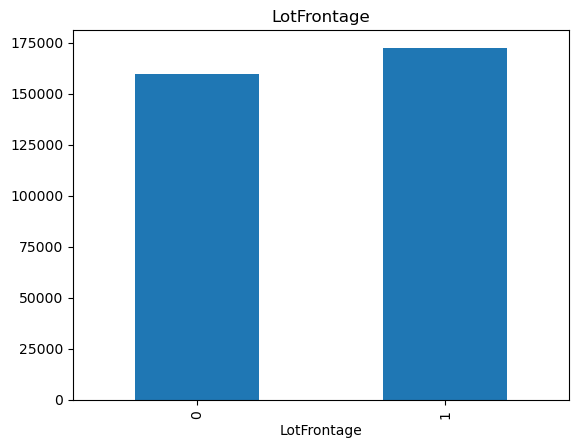

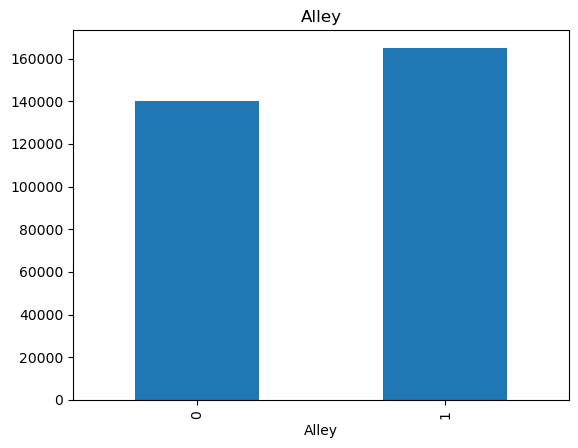

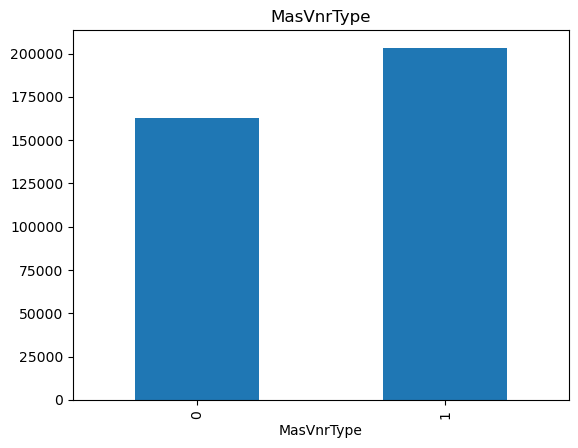

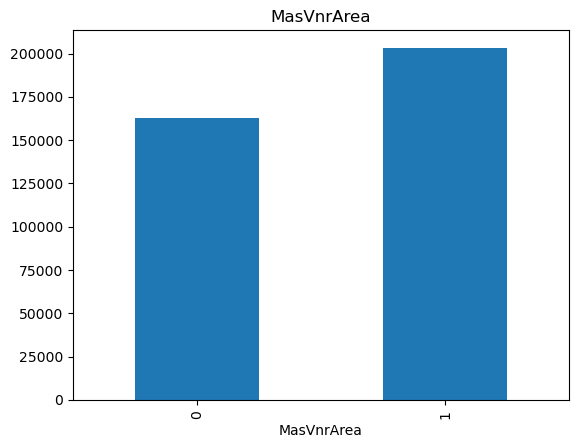

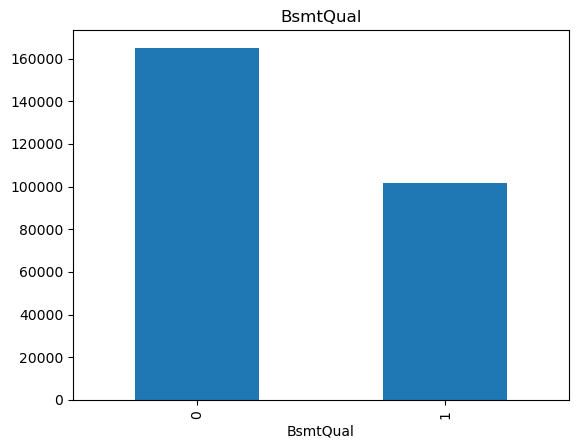

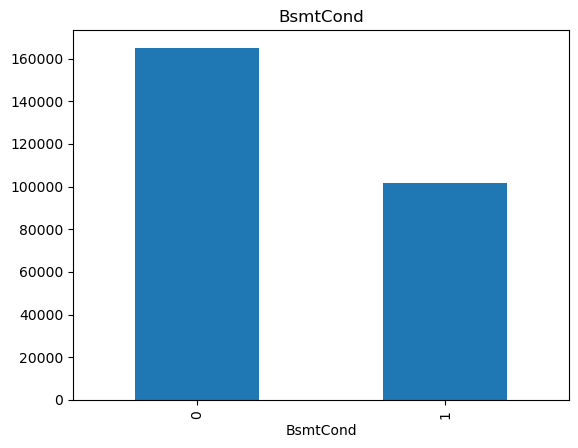

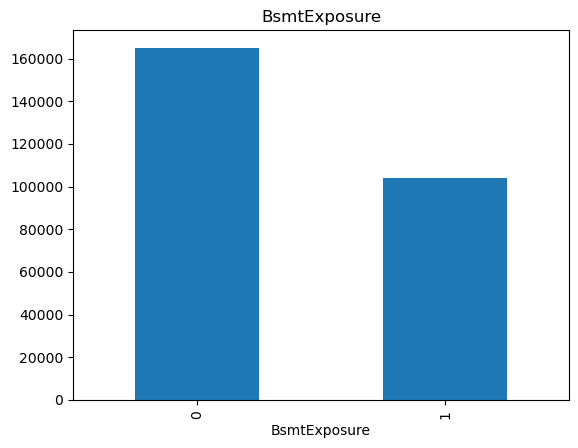

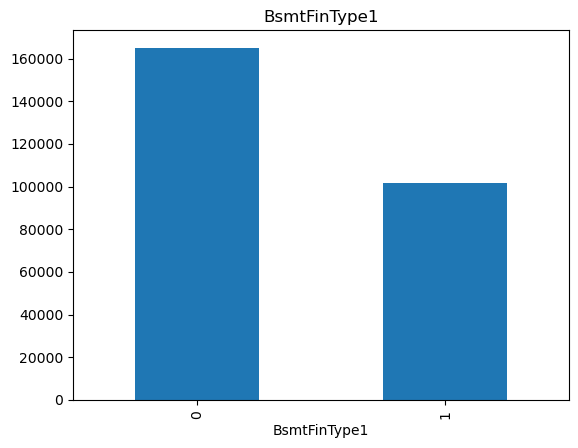

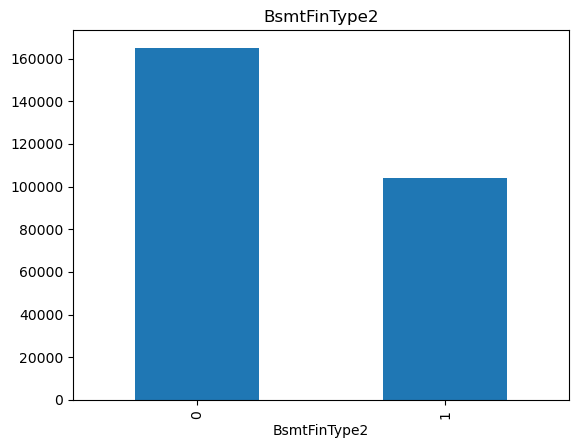

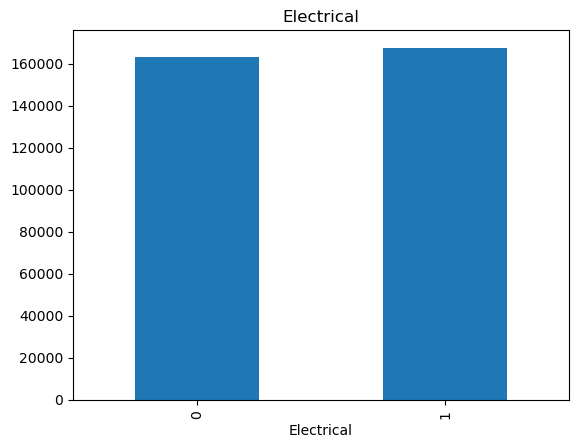

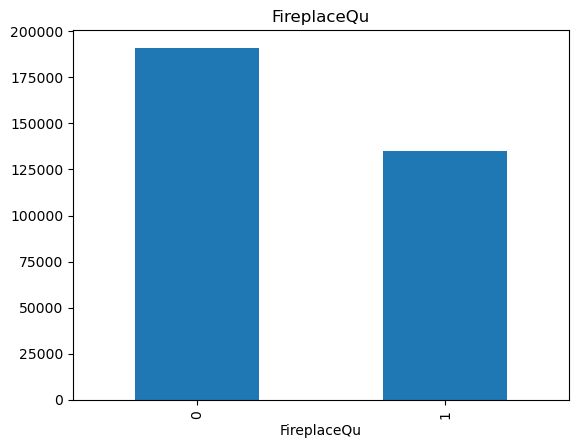

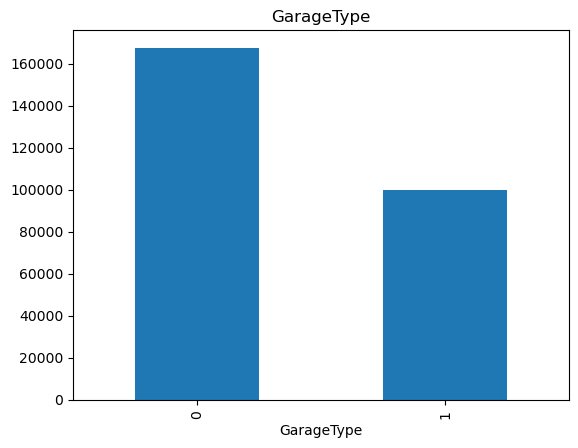

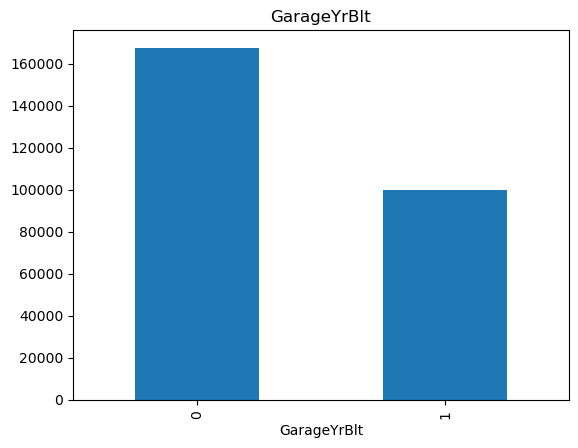

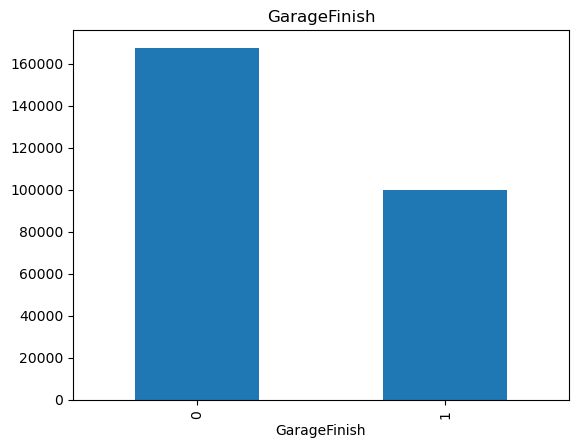

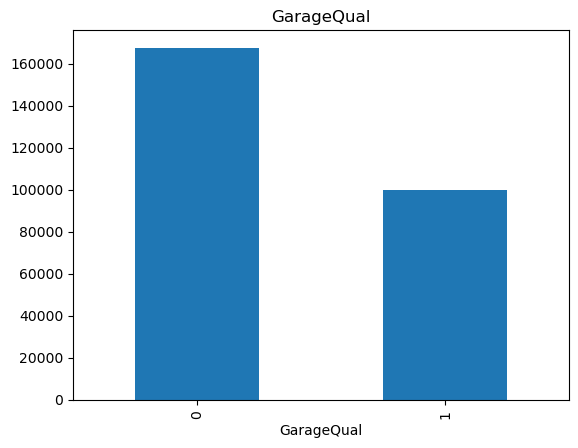

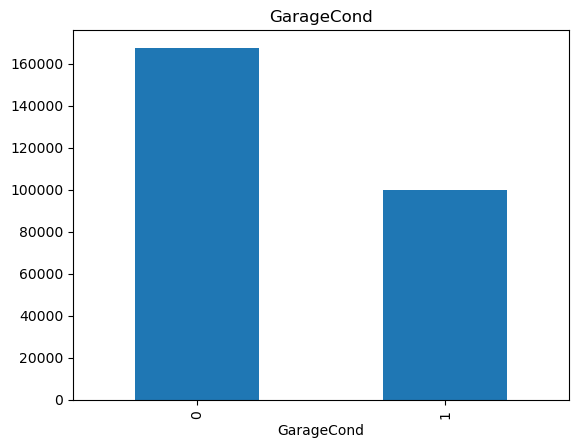

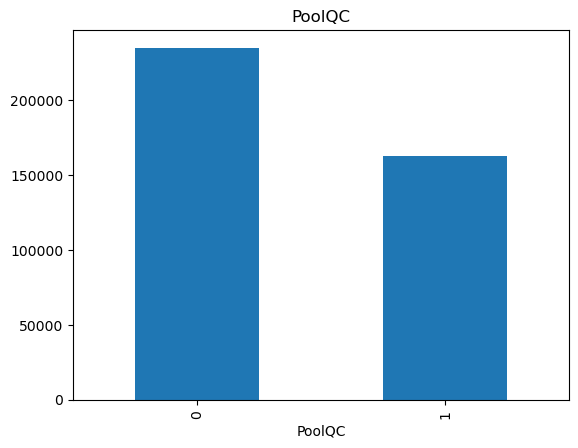

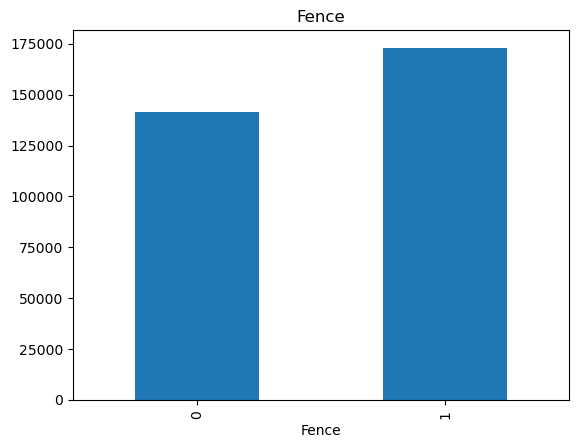

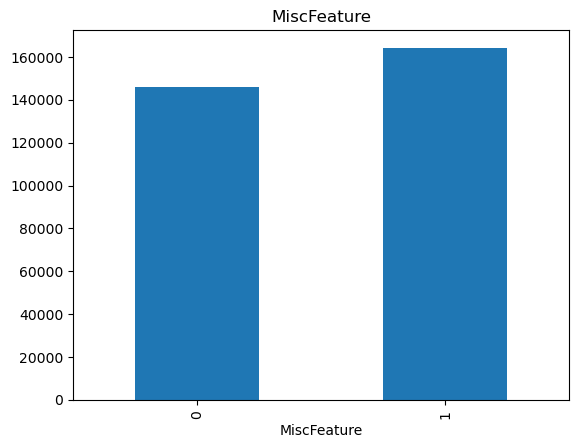

In [164]:
# Investigating relationship between missing values and the target variable.
df=data.copy()
df1=df.copy()

null_list=df.columns[df.isnull().any()].tolist()

for feature in null_list:
    
    df[feature]=np.where(df[feature].isnull(),1,0)
    df.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()


It can be seen that the relationship between missing values and the target variables is very significant. This shows that care must be taken in dealing with these missing values than just barely removing them.

In [165]:
num_var=df.select_dtypes(exclude='object') # Taking numerical variables only
print('Number of numerical variables is ', num_var.shape[1])

year_var=pd.concat([df.filter(regex='Yr',axis=1),df.filter(regex='Year',axis=1)]) # Getting the year columns

for feature in year_var:
    print(feature, '\n',df[feature].unique())

Number of numerical variables is  54
GarageYrBlt 
 [0 1]
YrSold 
 [2008 2007 2006 2009 2010]
YearBuilt 
 [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd 
 [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]


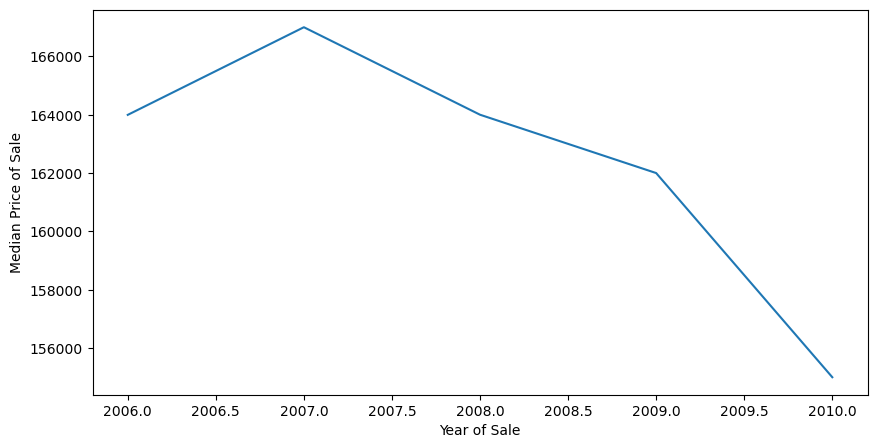

In [166]:
# Relationship between year of sale and sale price

df.groupby('YrSold')['SalePrice'].median().plot(figsize=(10,5))
plt.xlabel('Year of Sale')
plt.ylabel('Median Price of Sale')
plt.show()

It is surprising to see that the most recent year has small selling price. This could be worth investigating further if the need be.

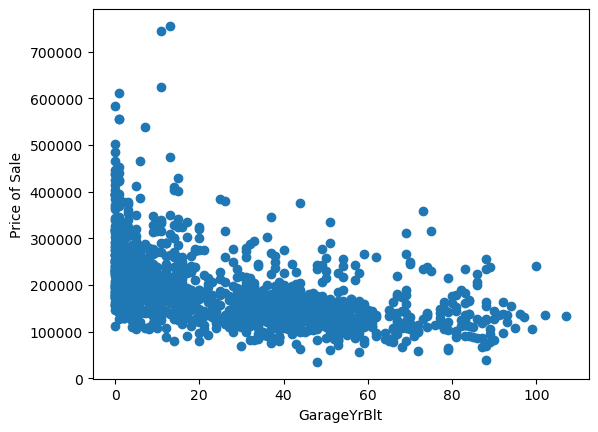

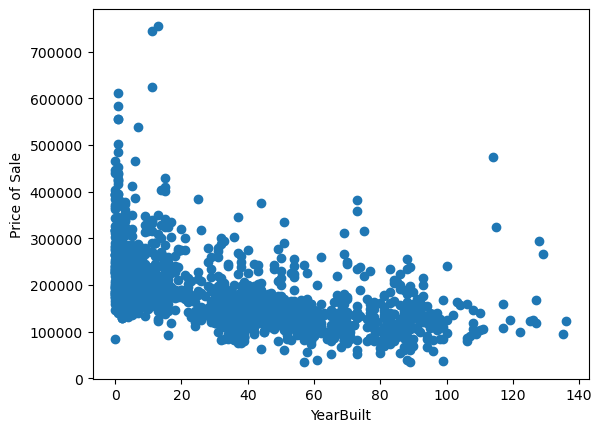

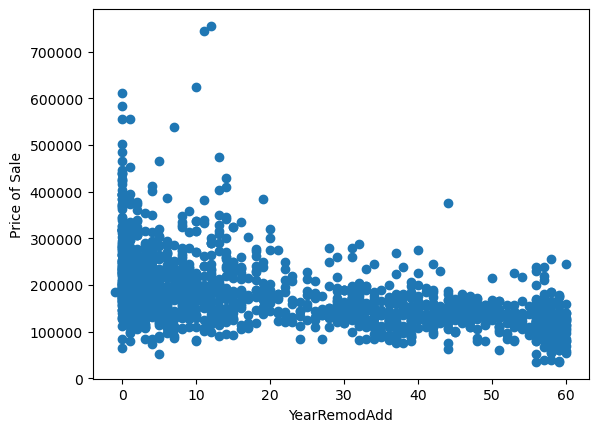

In [167]:
for feature in year_var:
    if 'YrSold'==feature:
        pass
    else:
        df1[feature]=df1['YrSold']-df1[feature]
        
        plt.scatter(df1[feature],df1['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('Price of Sale')
        plt.show()

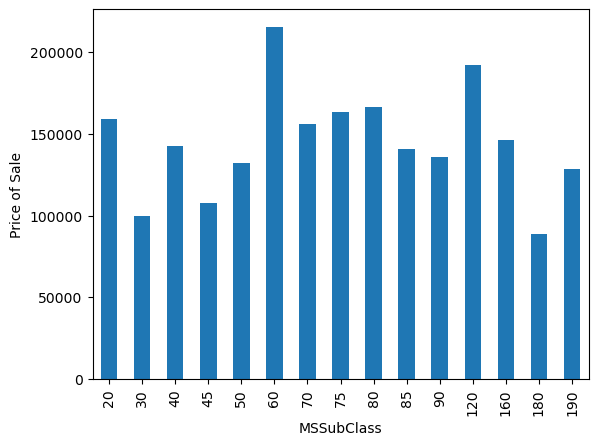

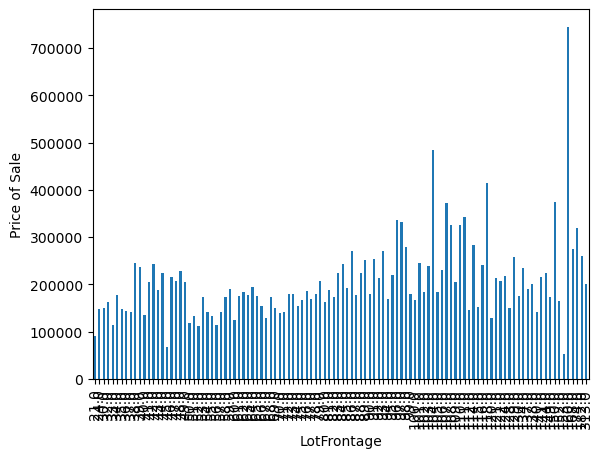

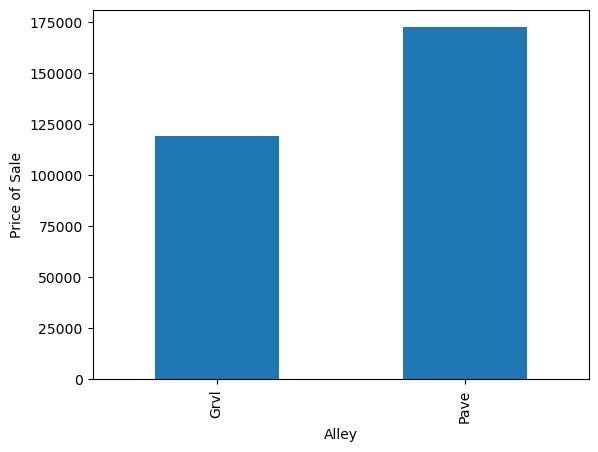

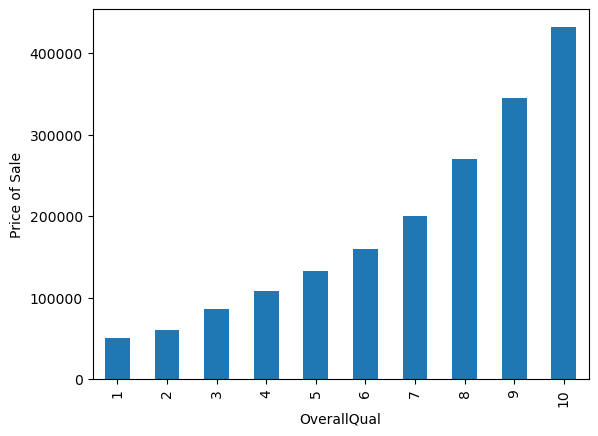

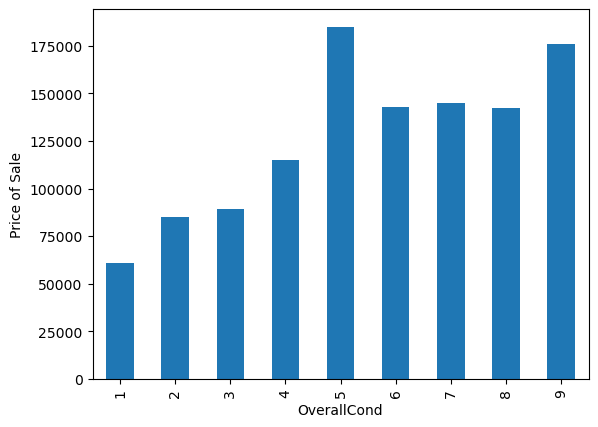

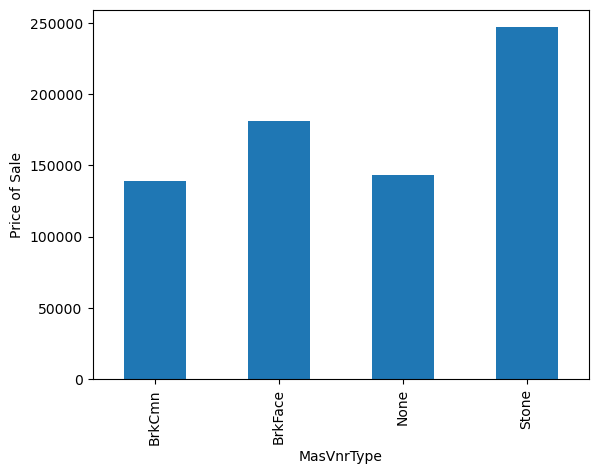

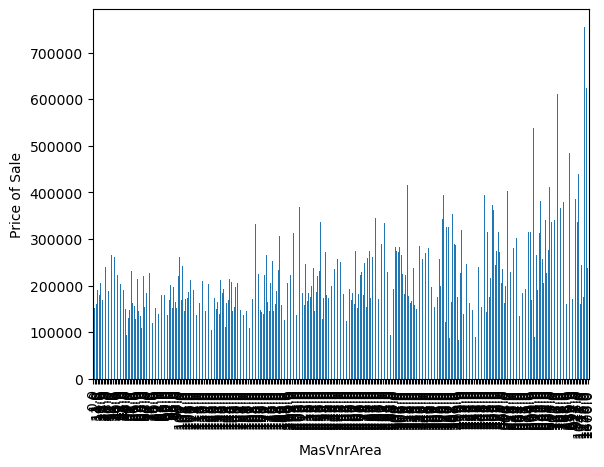

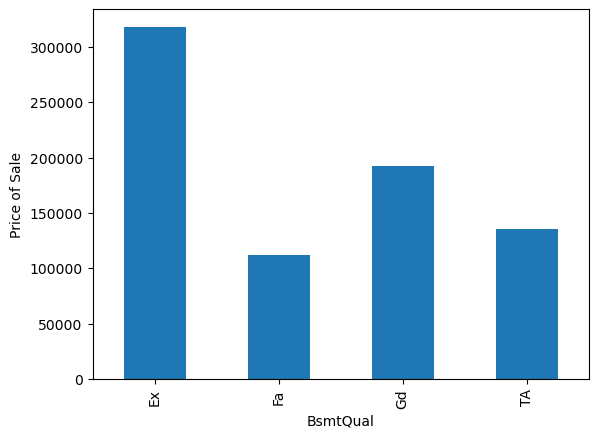

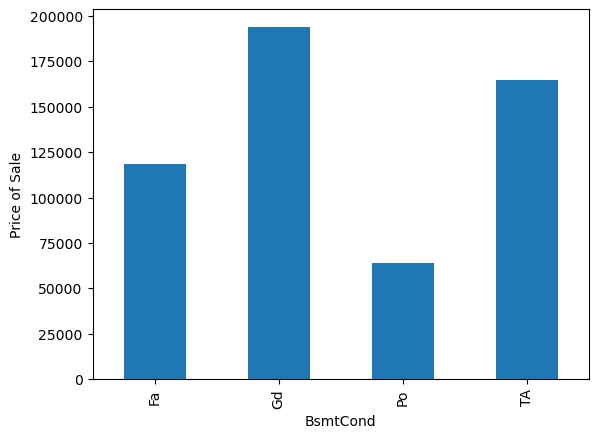

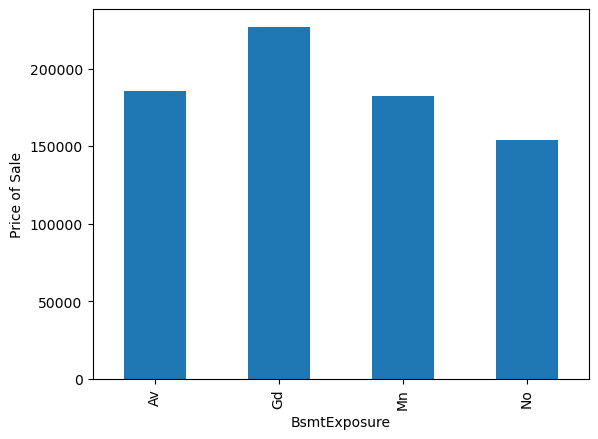

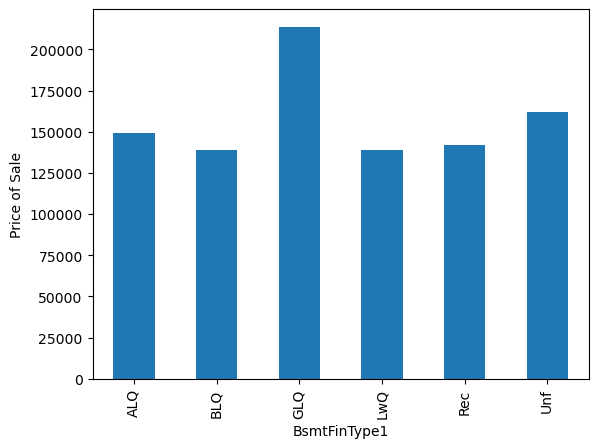

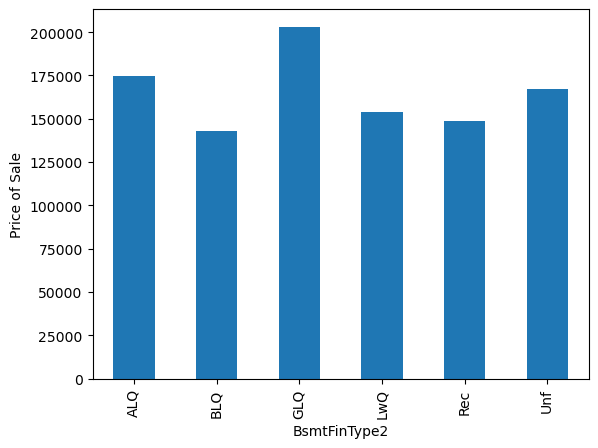

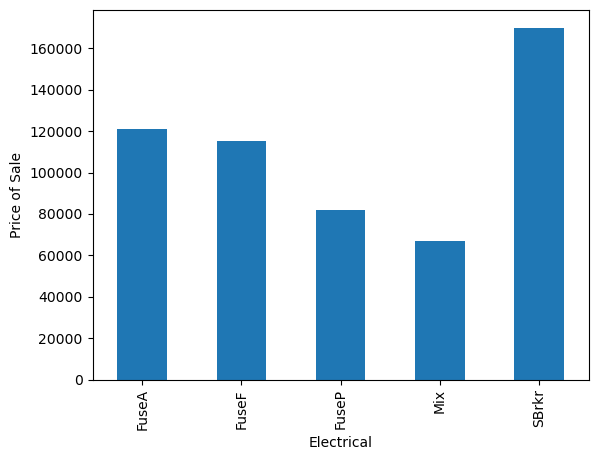

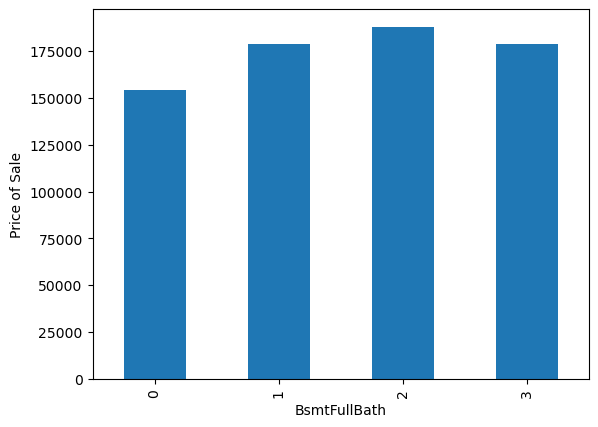

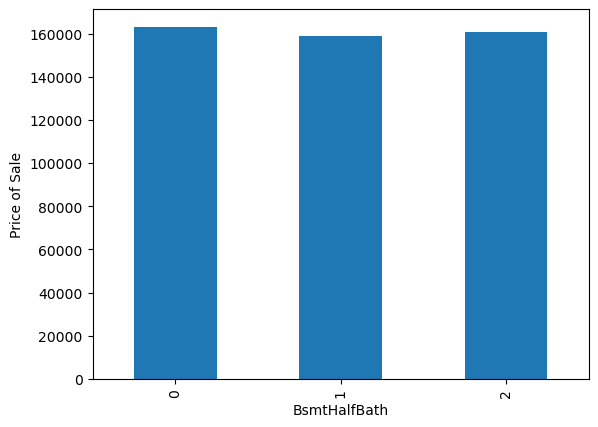

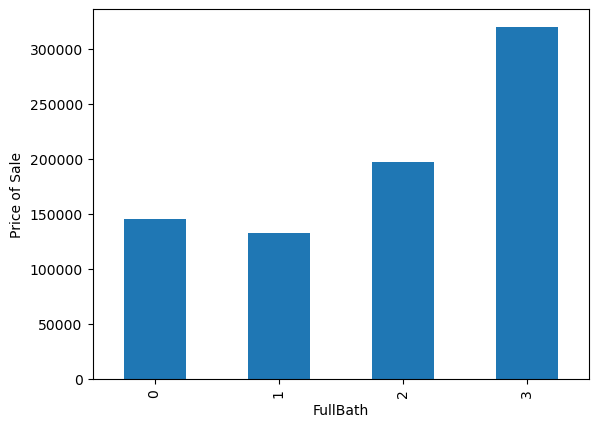

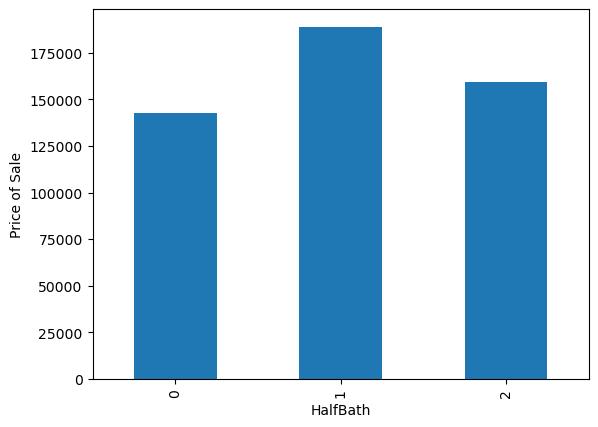

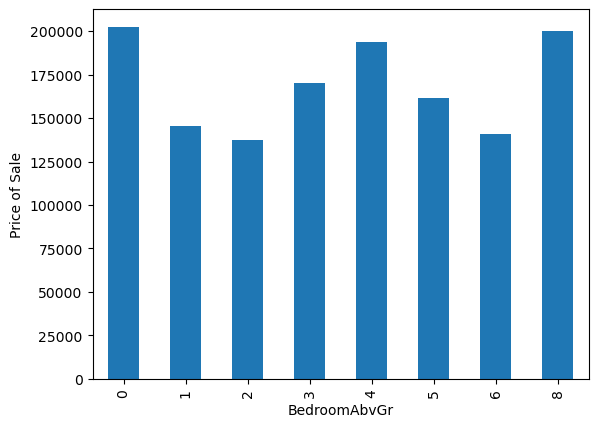

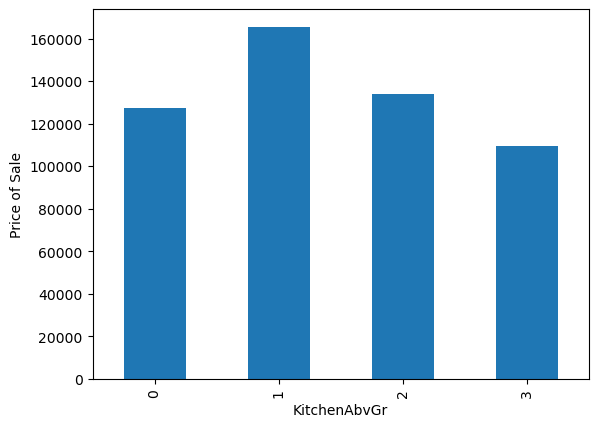

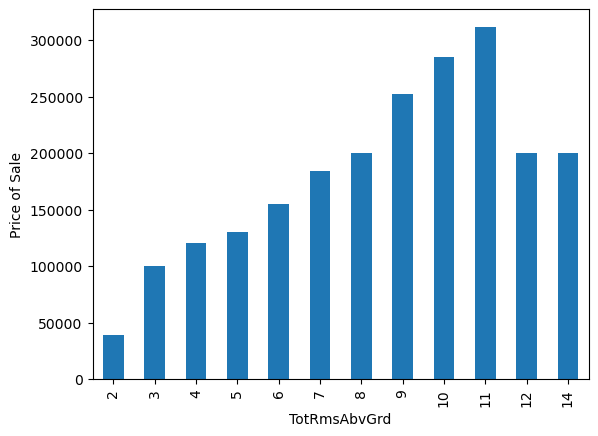

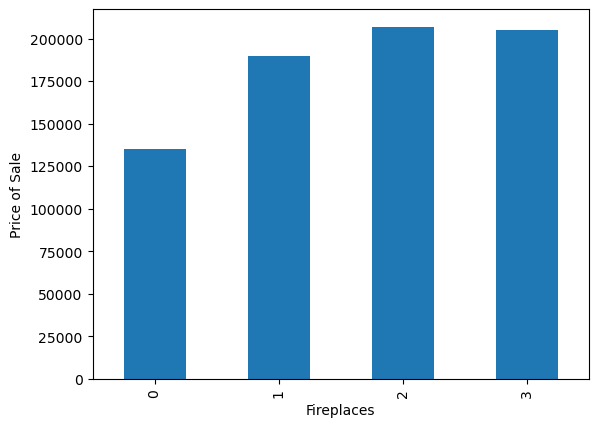

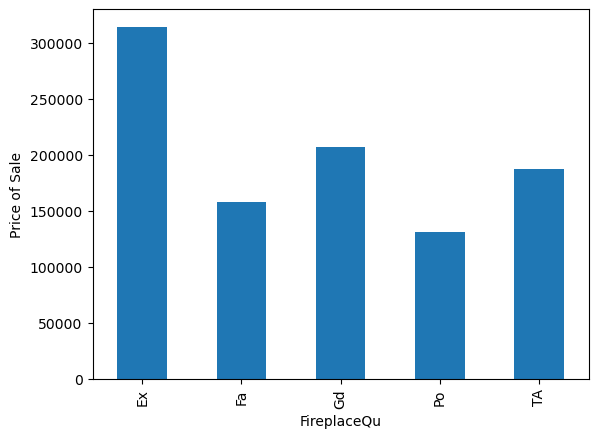

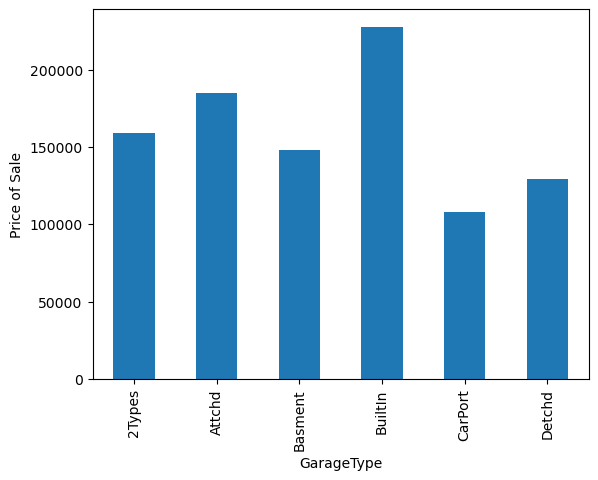

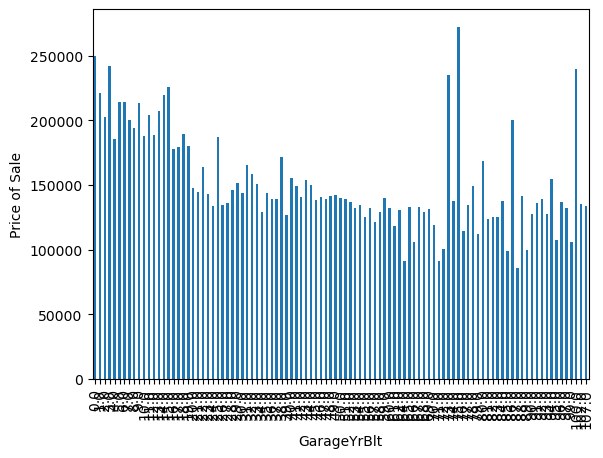

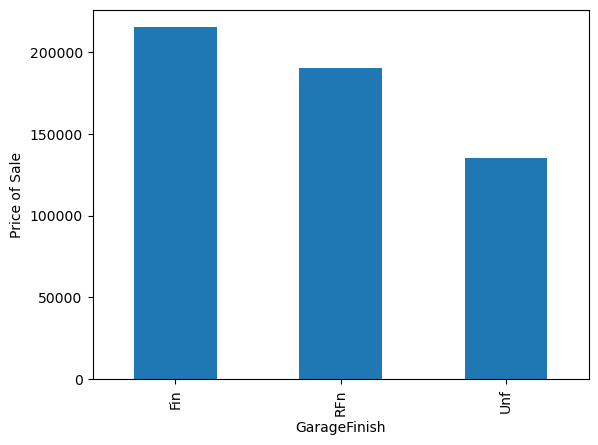

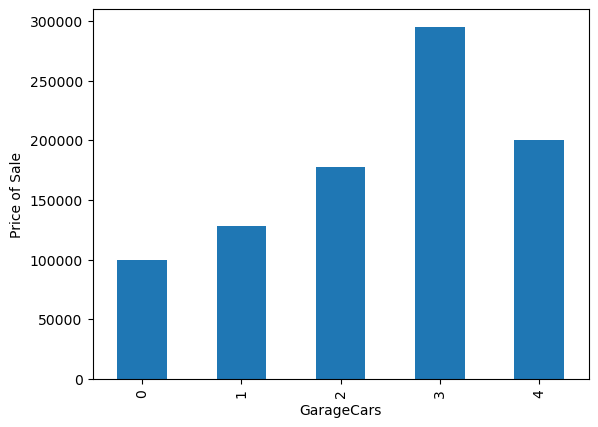

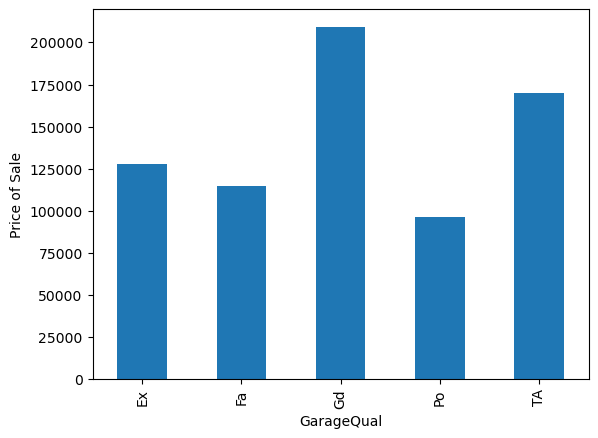

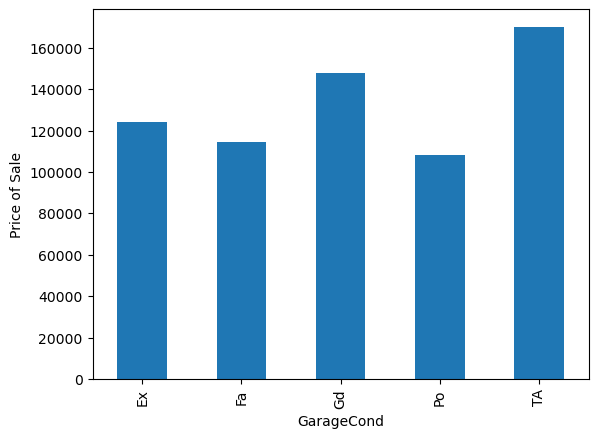

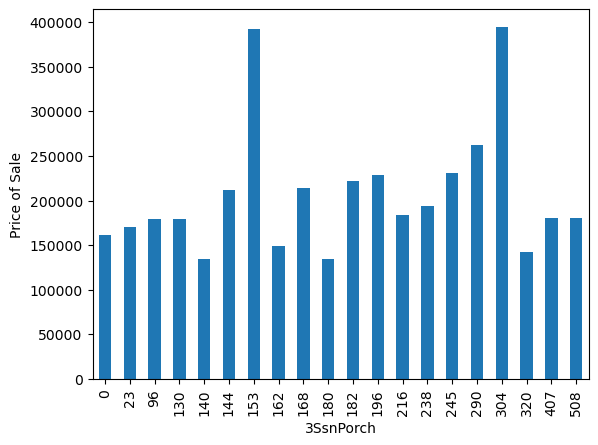

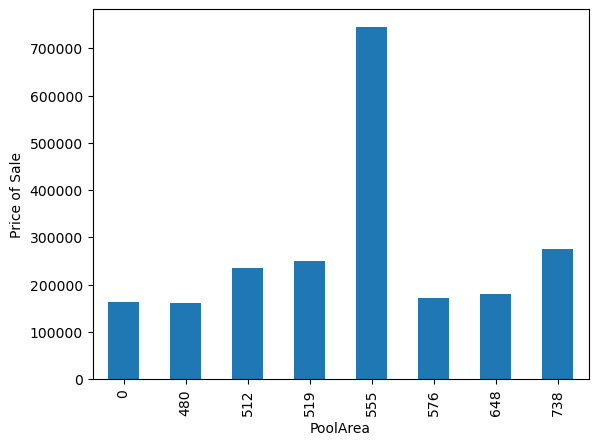

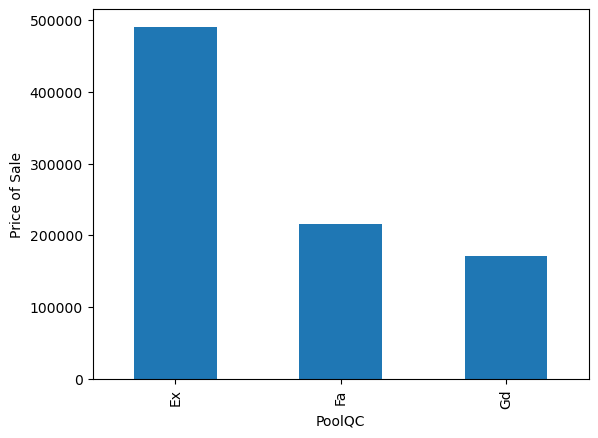

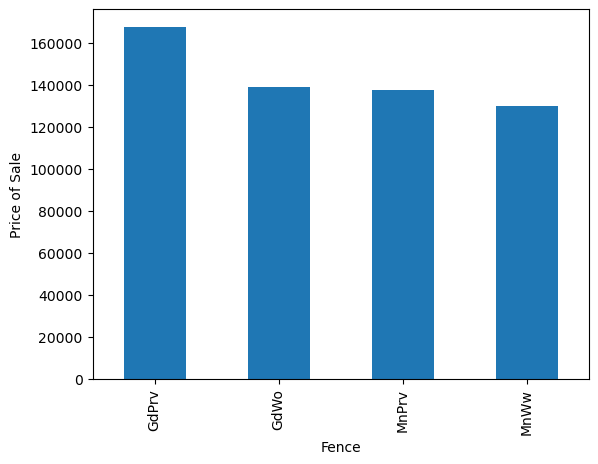

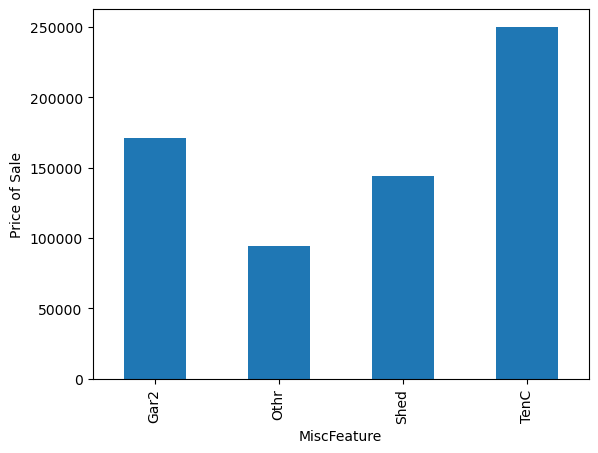

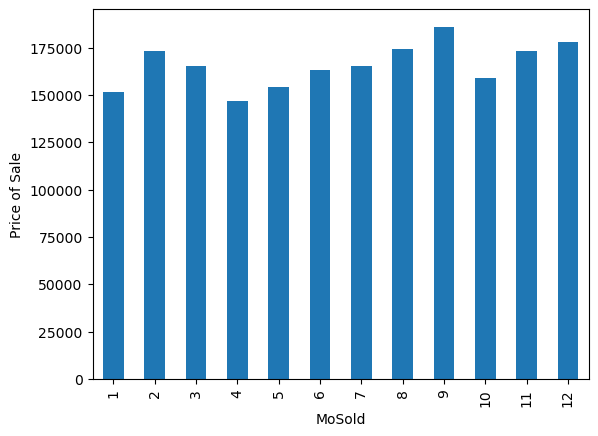

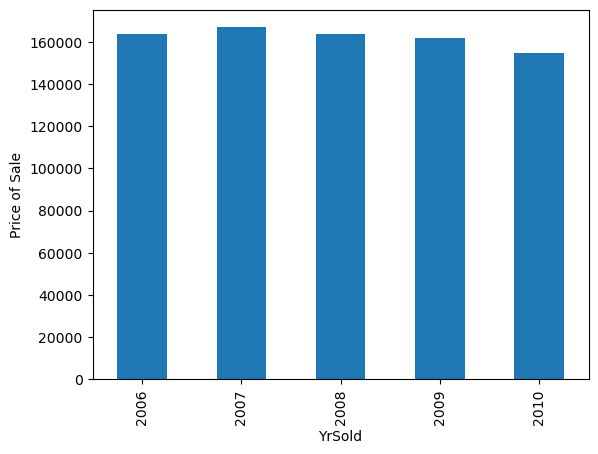

In [168]:
# Investigating the discrete variables.

threshold=20

discrete_var=[col for col in num_var.select_dtypes(include=['int','int64']).columns if df[col].nunique()<=threshold]

for feature in discrete_var:
        
        df1.groupby(feature)['SalePrice'].median().plot.bar()
        
        plt.xlabel(feature)
        plt.ylabel('Price of Sale')
        plt.show()

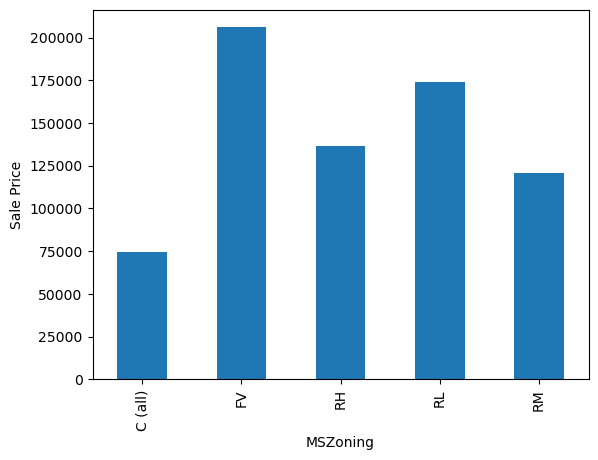

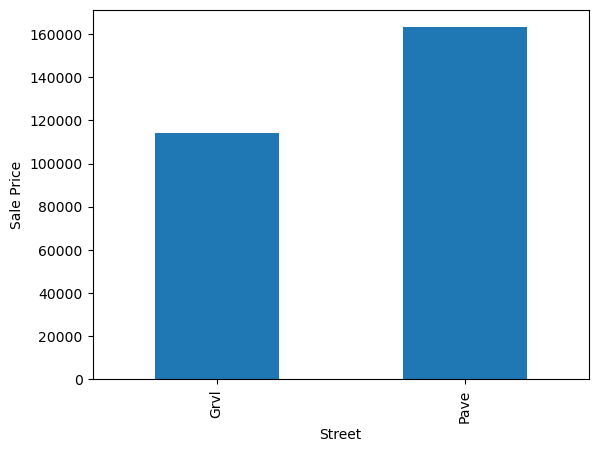

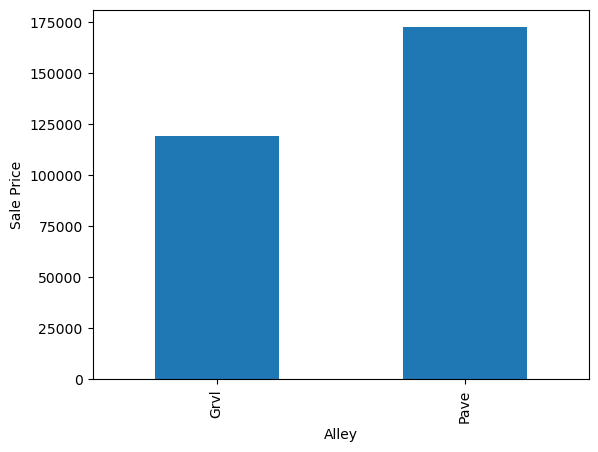

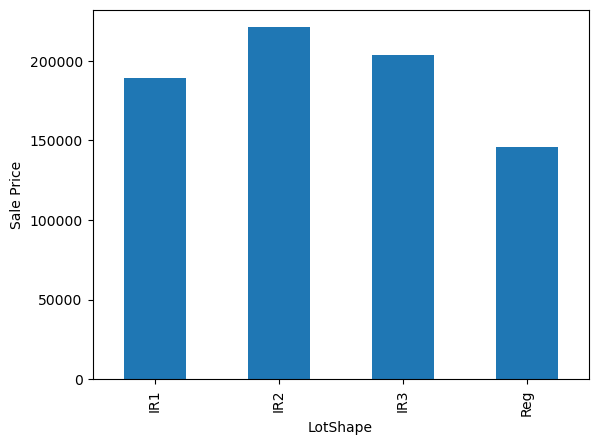

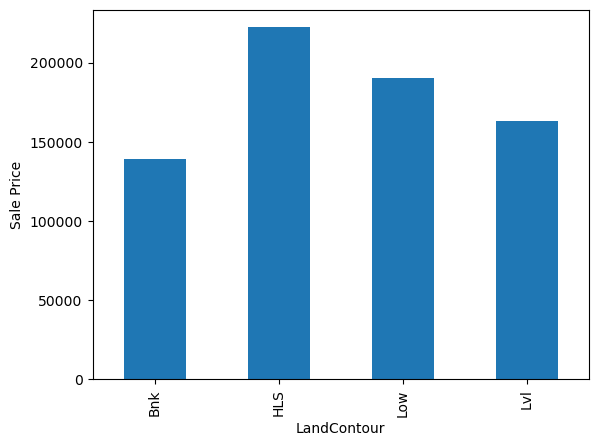

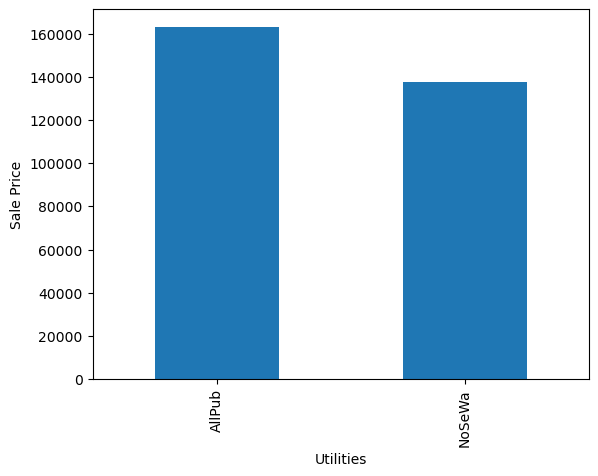

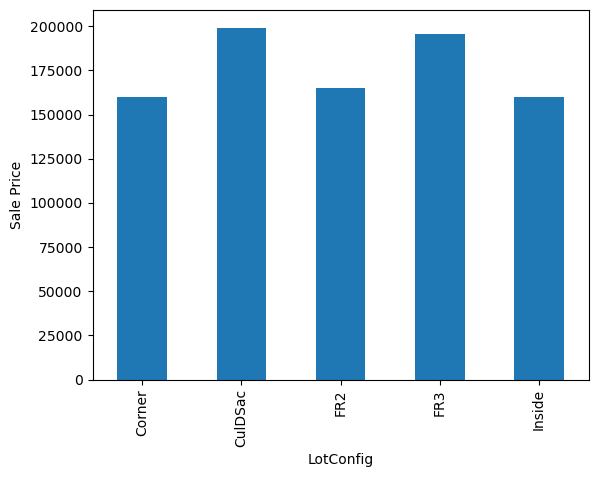

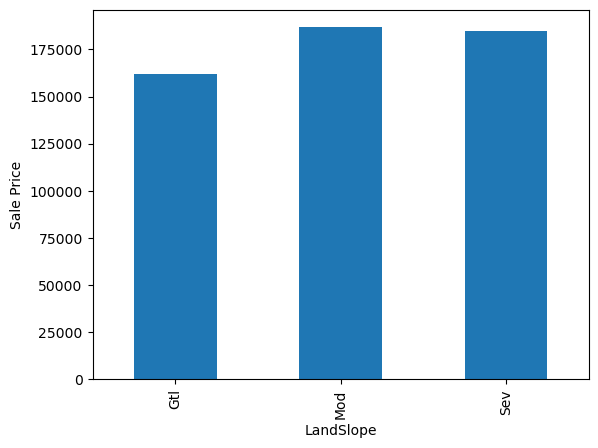

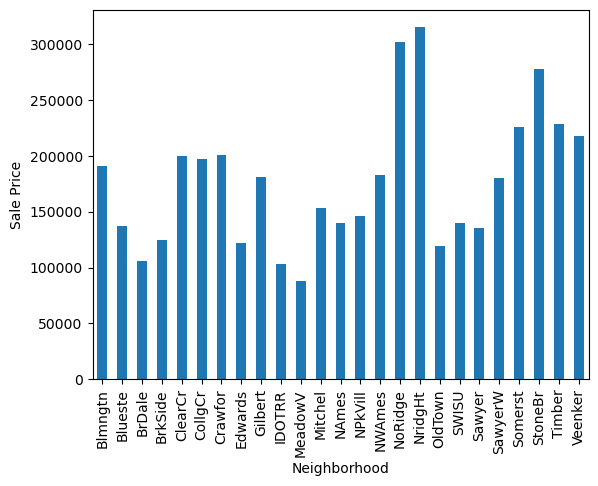

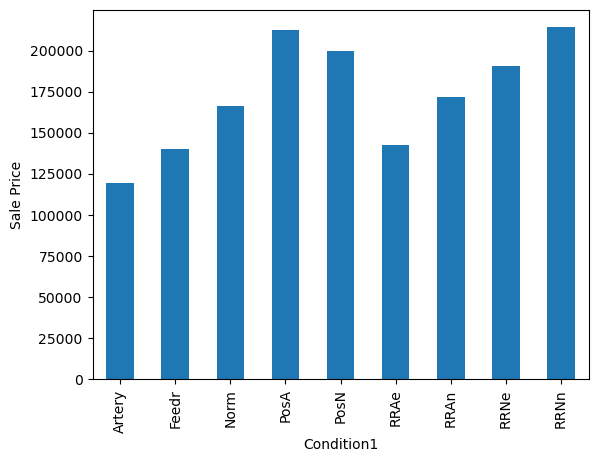

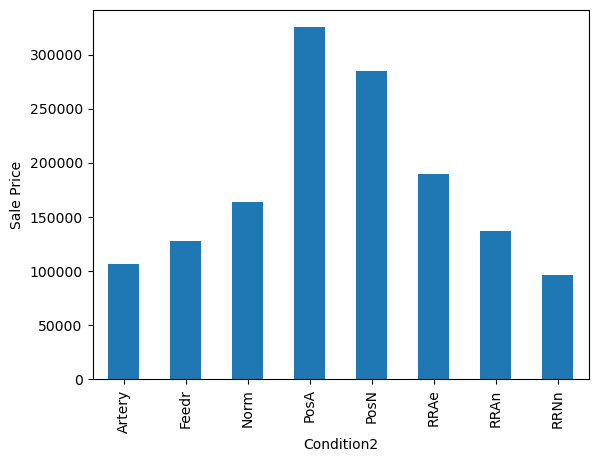

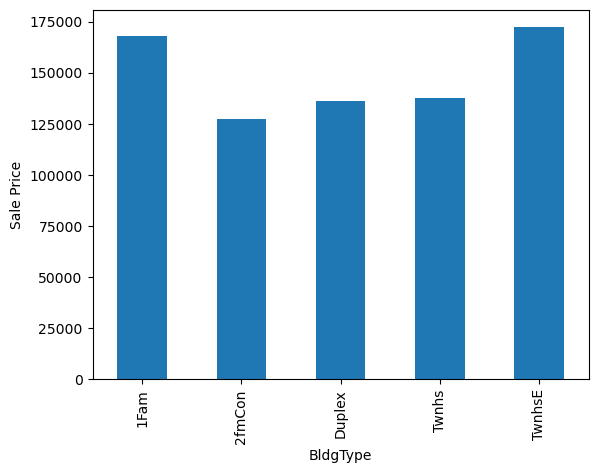

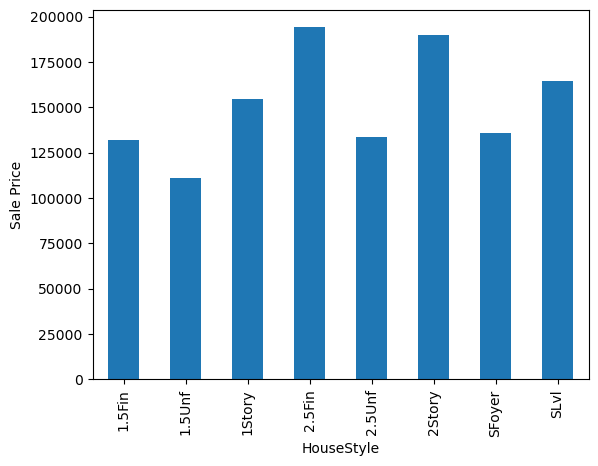

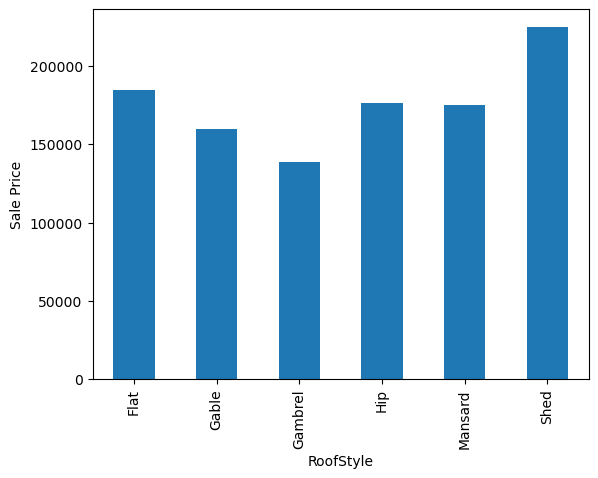

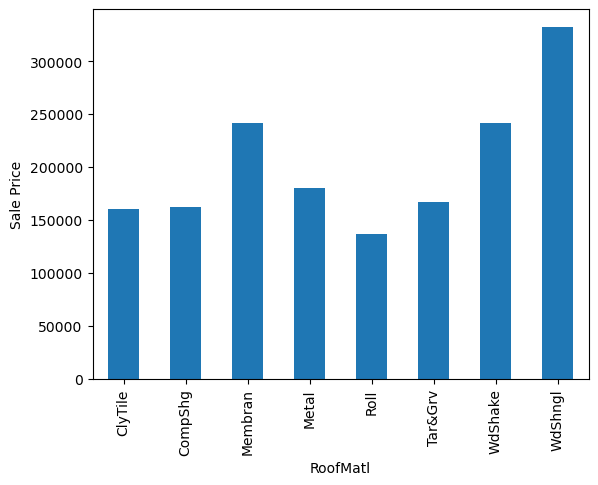

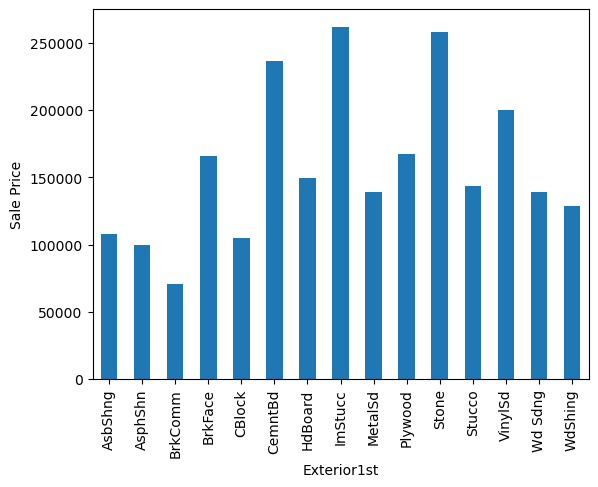

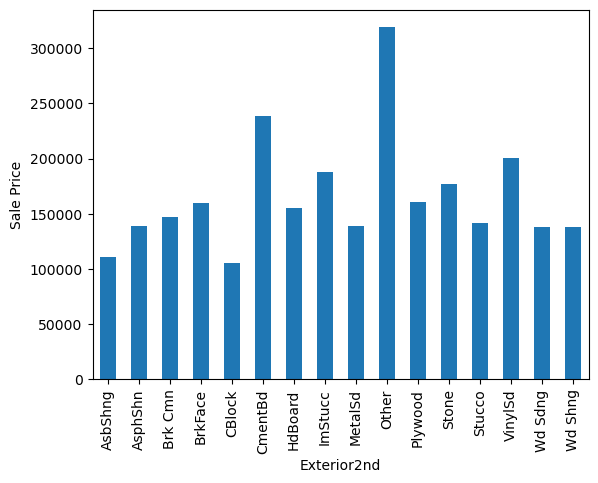

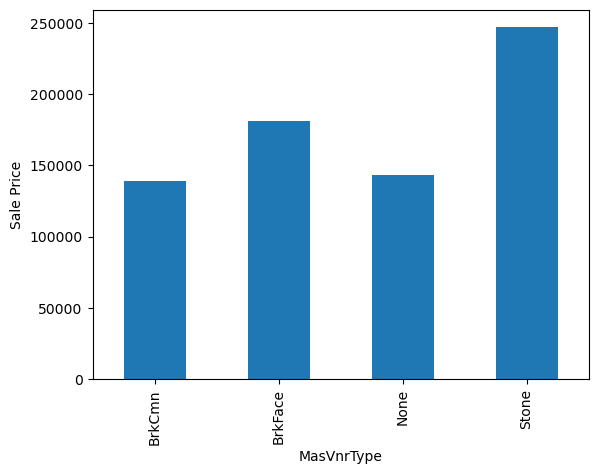

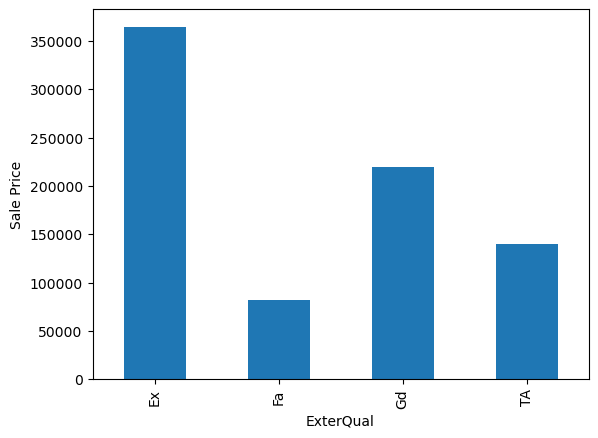

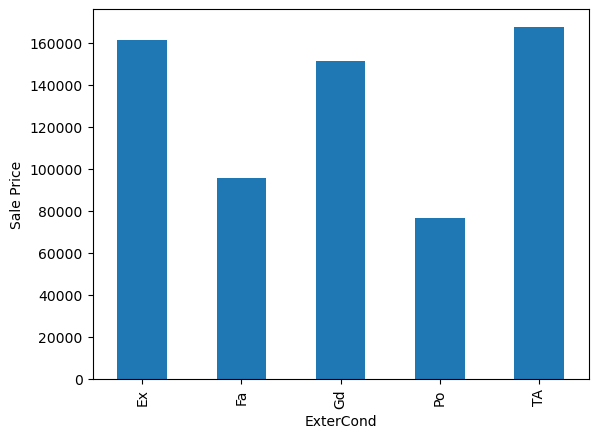

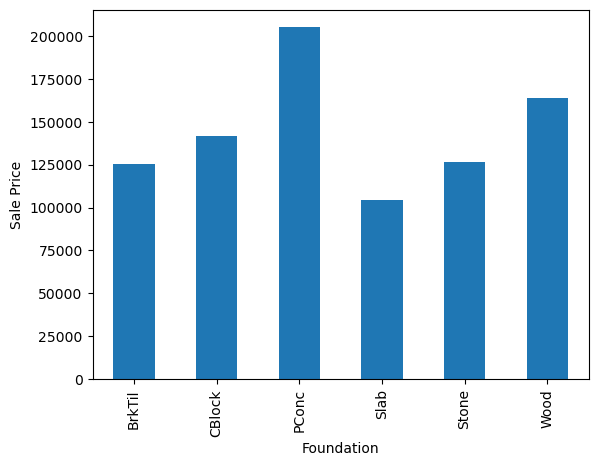

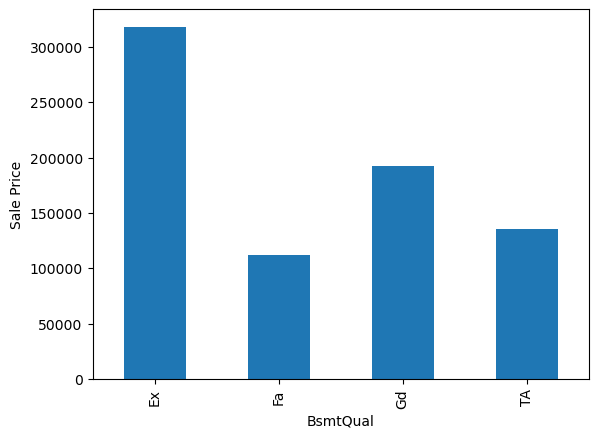

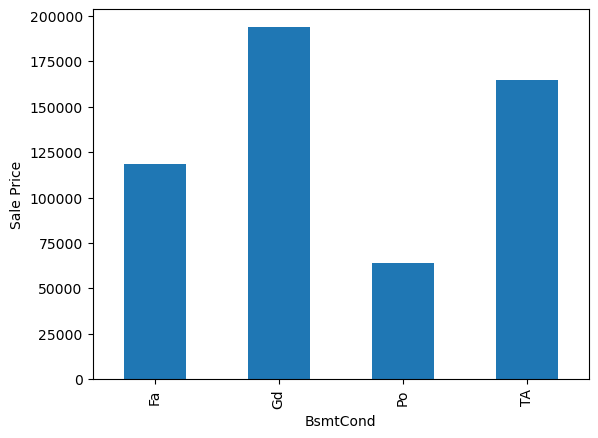

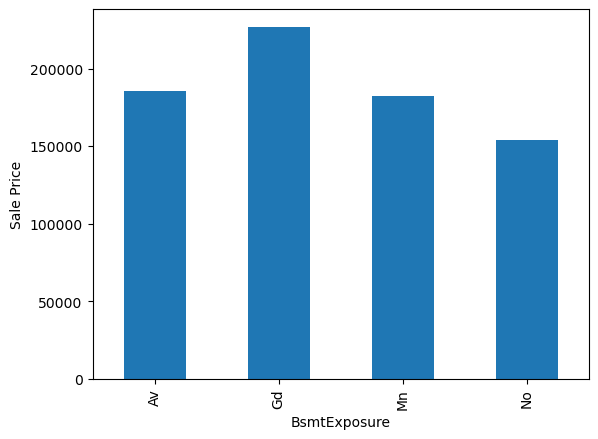

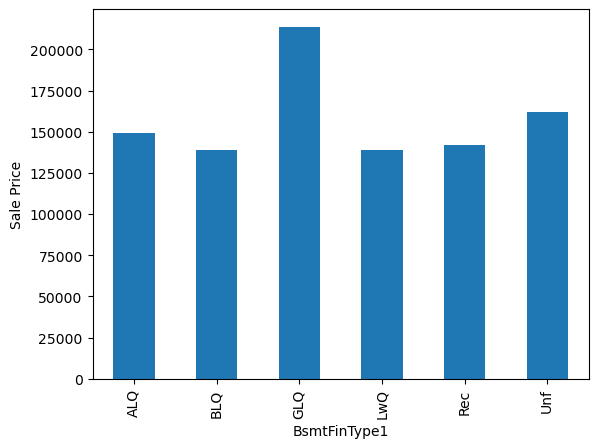

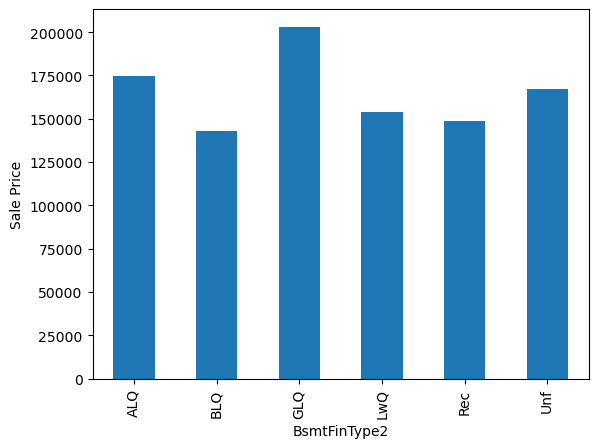

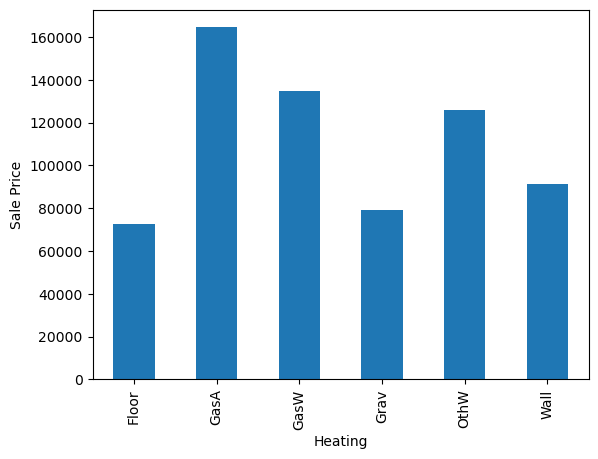

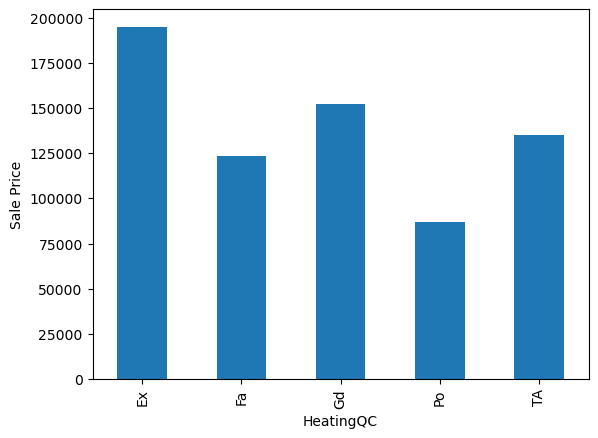

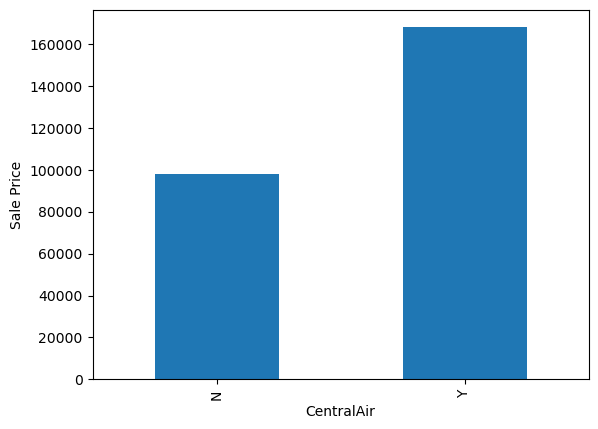

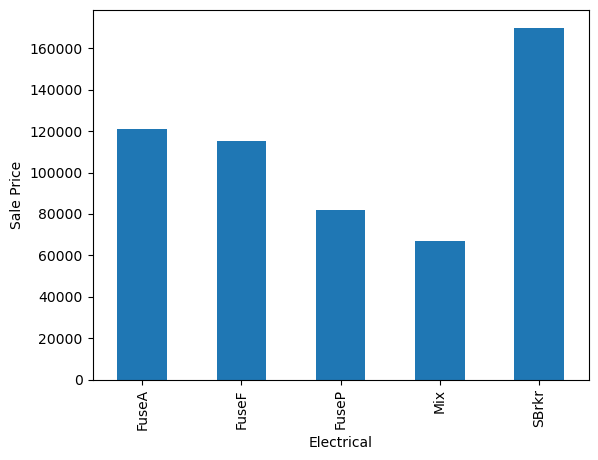

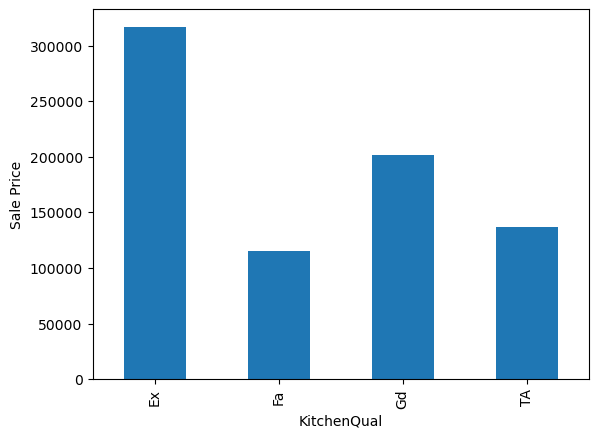

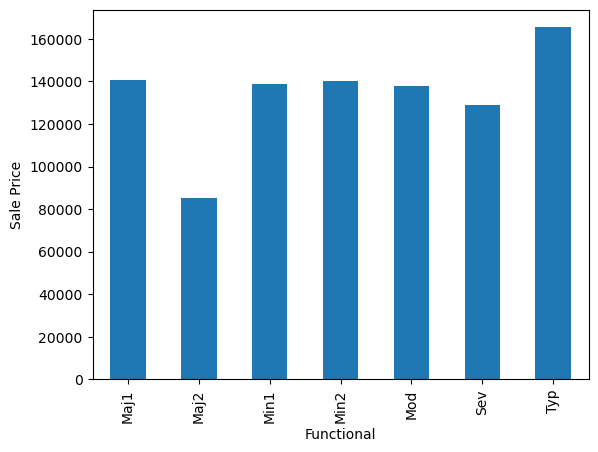

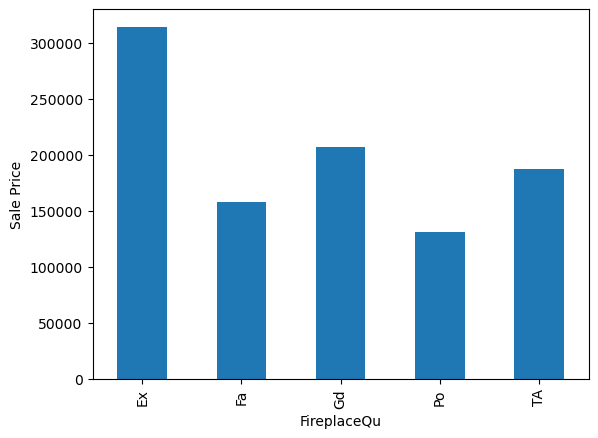

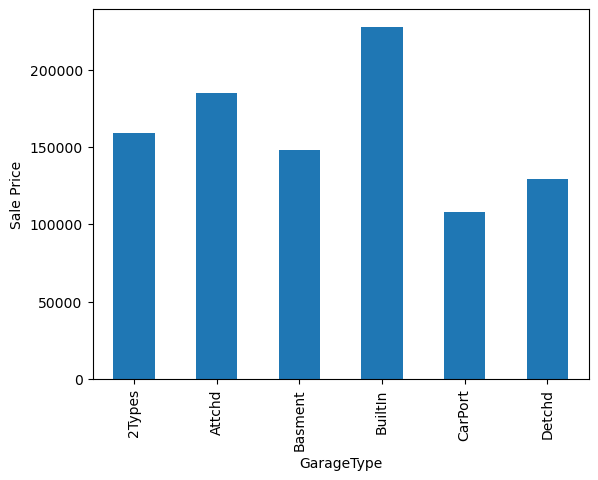

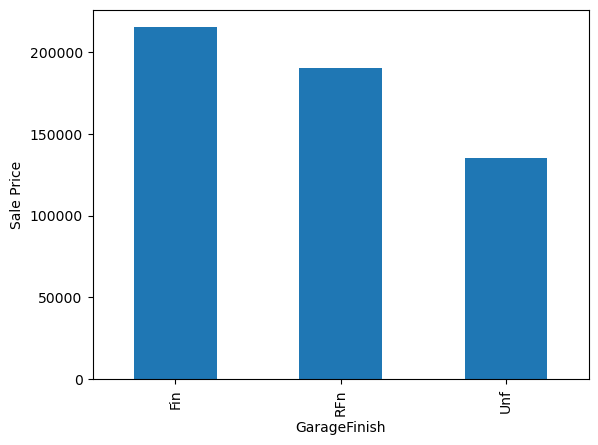

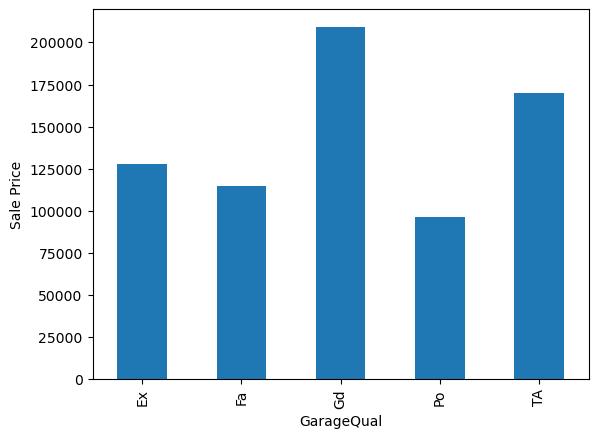

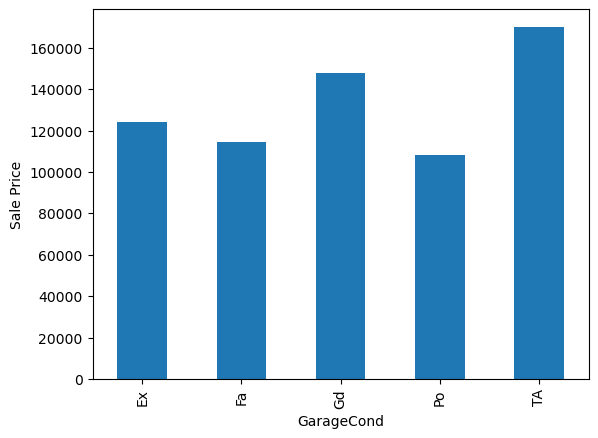

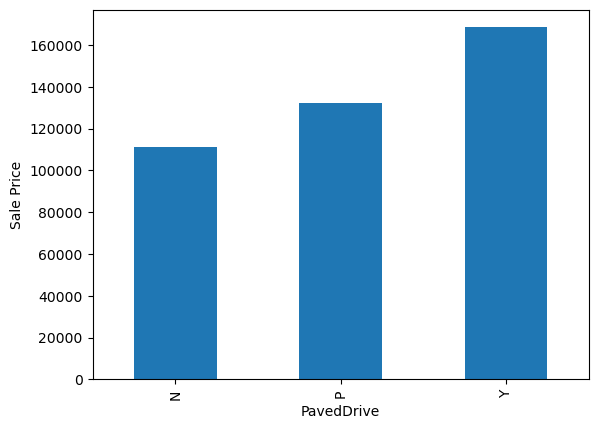

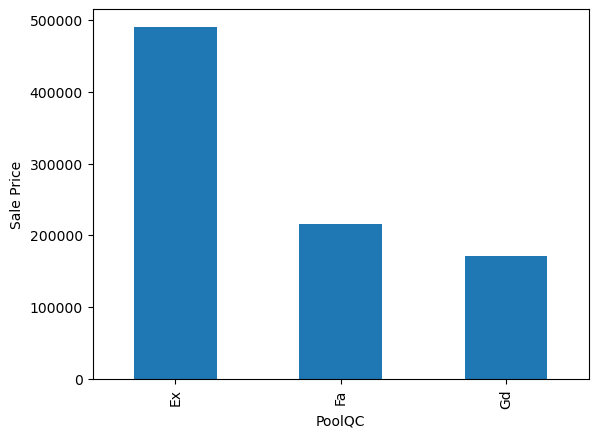

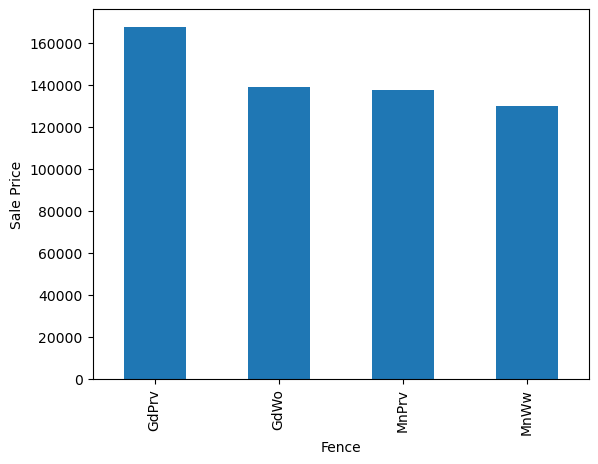

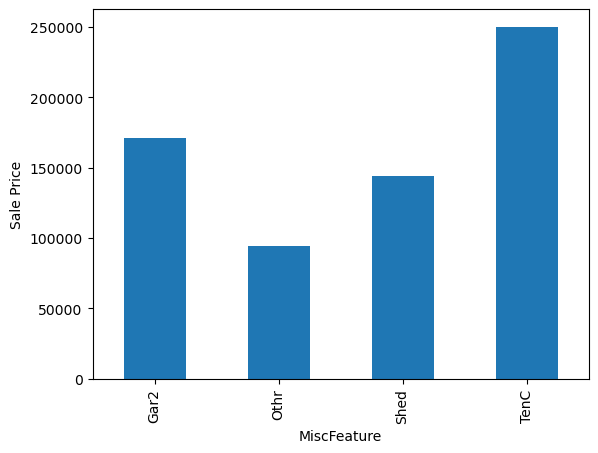

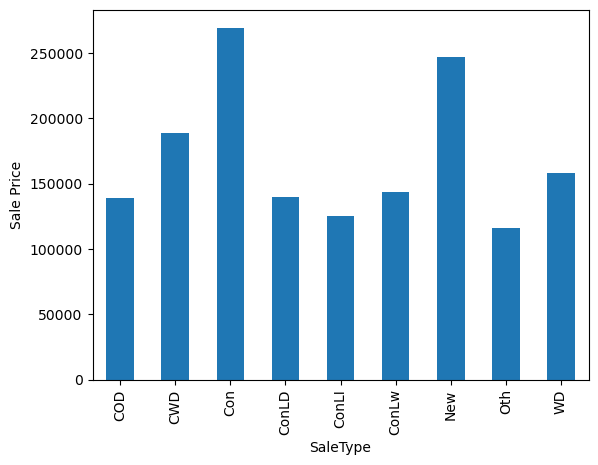

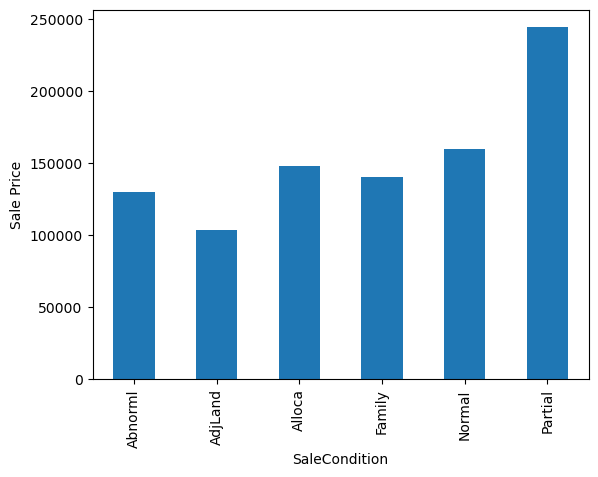

In [169]:
# Exploring the relationship between the categorical variables and the target variable.

categorical_var=df1.select_dtypes(include='object').columns

for feature in categorical_var:
    
    df1.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.show()

In [170]:
# Dropping columns with missing values greater than 90% of total column values.

missing_percent = data.isnull().mean()*100
cols_to_drop = missing_percent[missing_percent > 0.9].index
data.drop(columns=cols_to_drop, inplace=True)
print("New shape after dropping columns:", data.shape)

New shape after dropping columns: (1460, 65)


#### Examining the target variable in detail

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


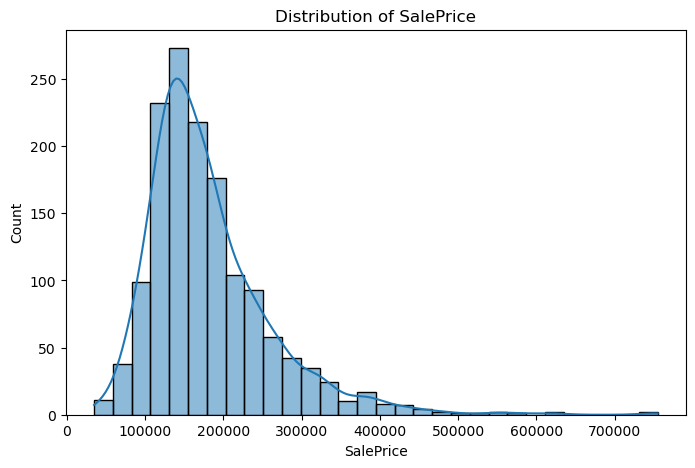

Skewness: 1.8828757597682129


In [100]:
# Summary statistics
print(data['SalePrice'].describe())

# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(data['SalePrice'], kde=True, bins=30)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Count")
plt.show()

# Checking skewness
print("Skewness:", data['SalePrice'].skew())


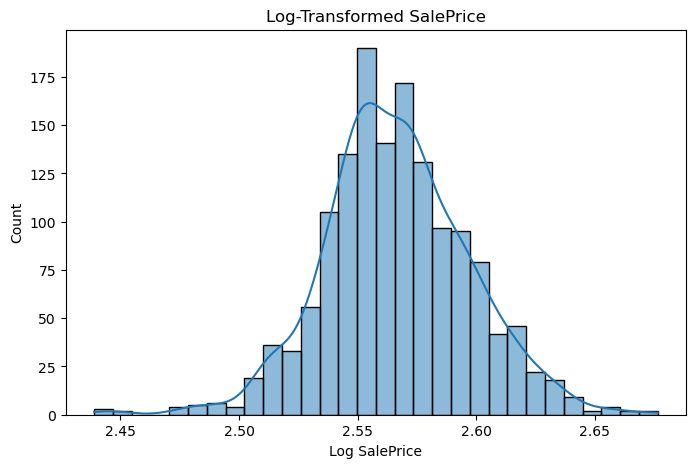

New skewness: -0.00922874059690396


In [174]:
# Applying log transformation to reduce skewness
data['SalePrice'] = np.log1p(data['SalePrice'])

# Checking new distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['SalePrice'], kde=True, bins=30)
plt.title("Log-Transformed SalePrice")
plt.xlabel("Log SalePrice")
plt.ylabel("Count")
plt.show()

# Confirm new skewness
print("New skewness:", data['SalePrice'].skew())


In [102]:
# Check remaining missing values
missing_summary = data.isnull().sum()
missing_summary = missing_summary[missing_summary > 0].sort_values(ascending=False)
print("Columns still with missing values:\n")
print(missing_summary)


Columns still with missing values:

MasVnrType    8
MasVnrArea    8
Electrical    1
dtype: int64


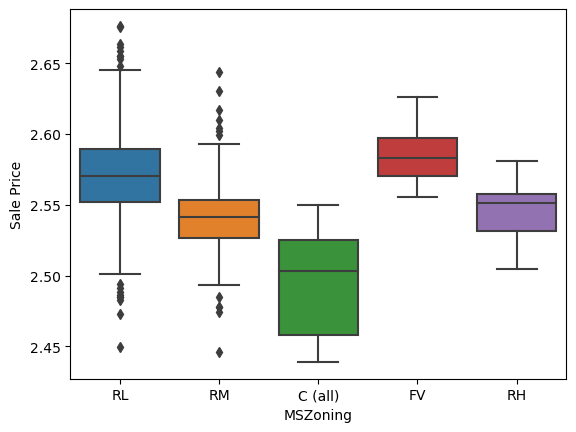

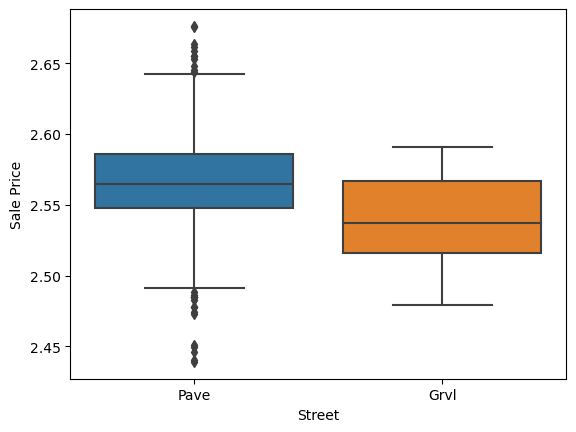

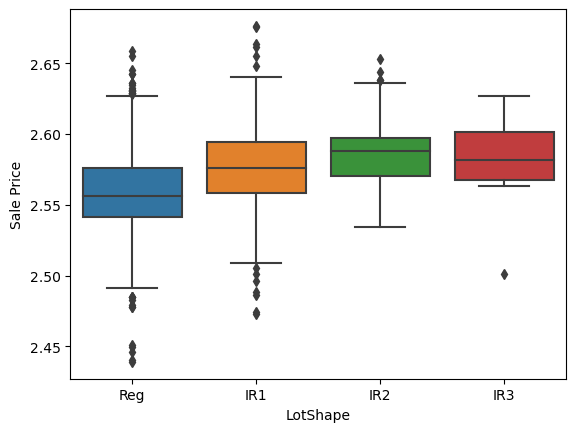

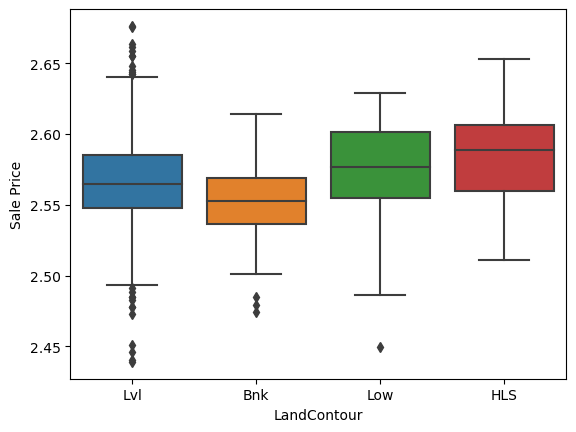

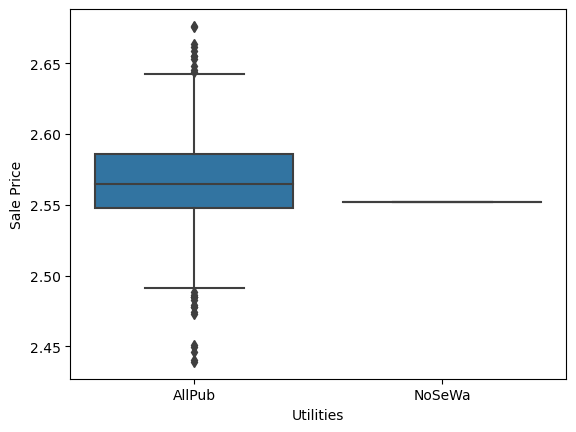

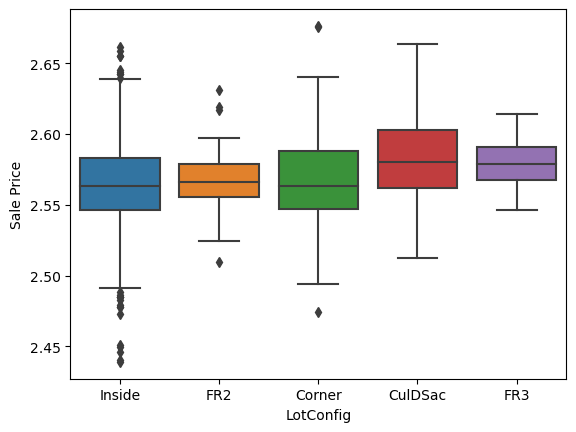

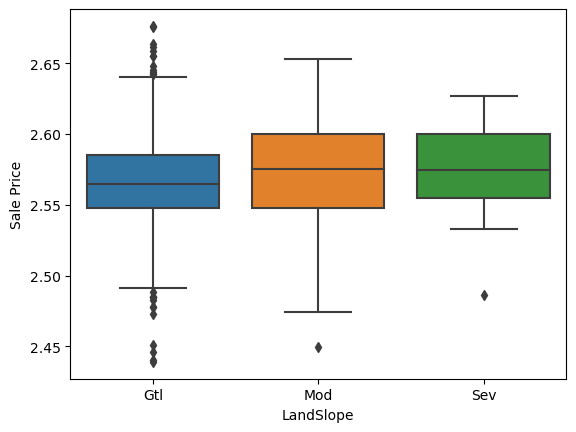

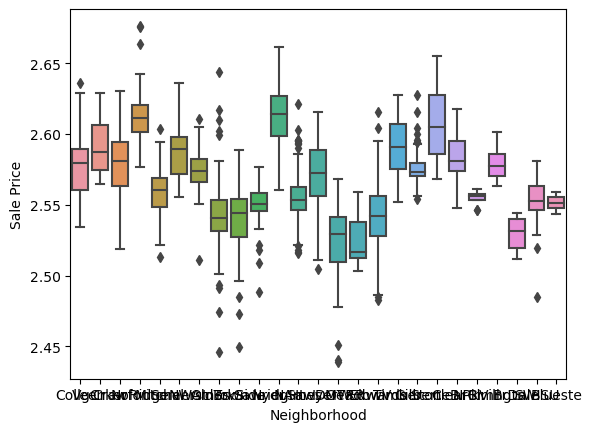

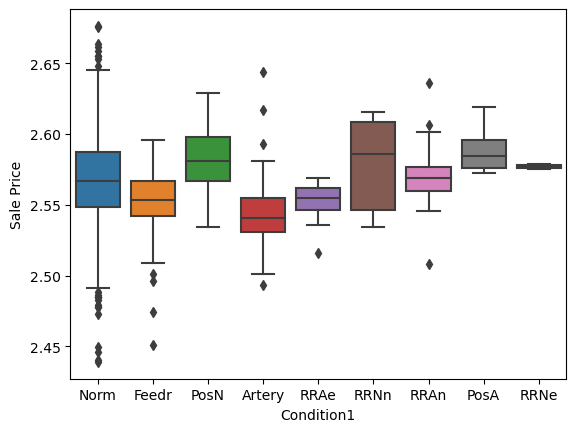

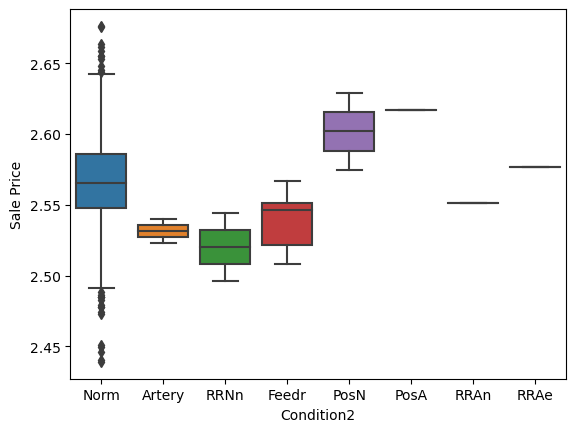

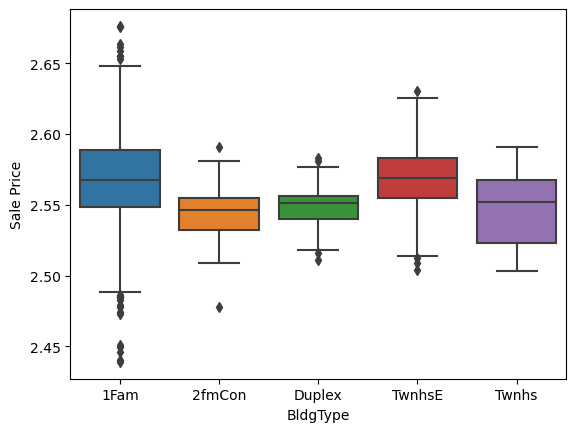

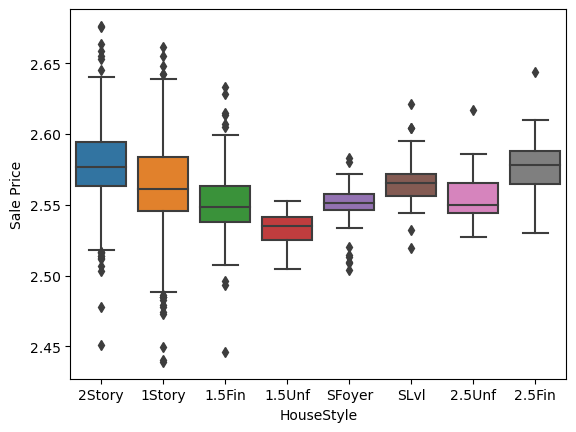

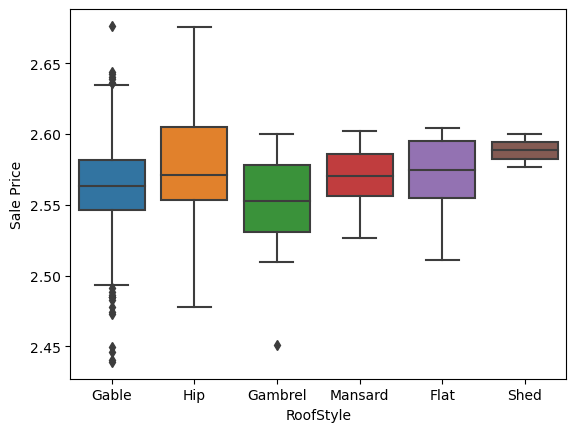

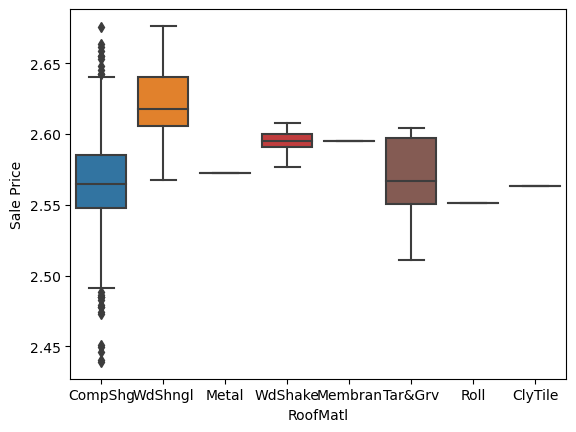

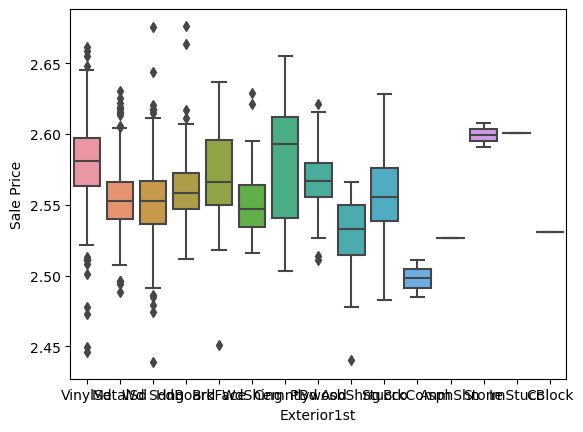

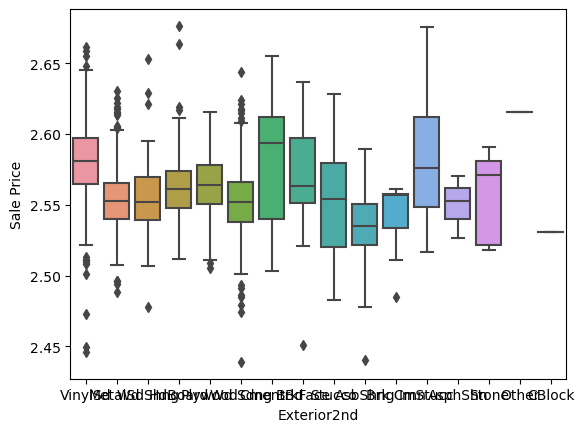

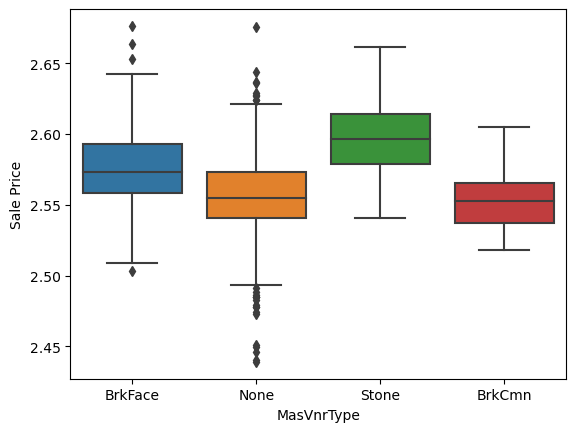

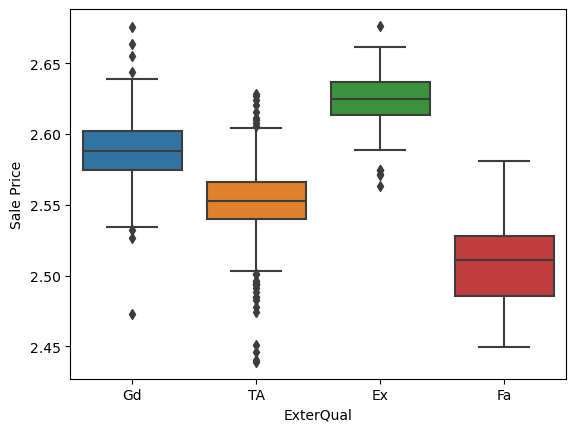

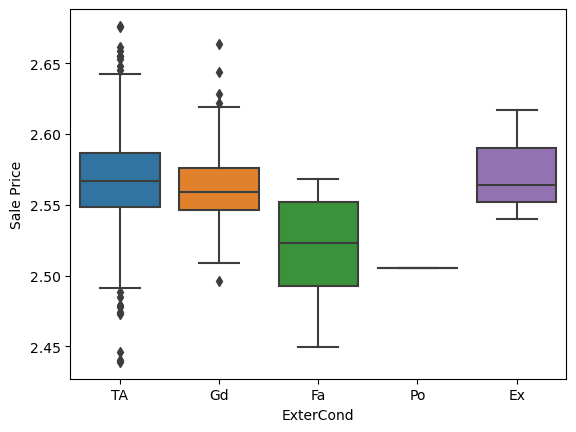

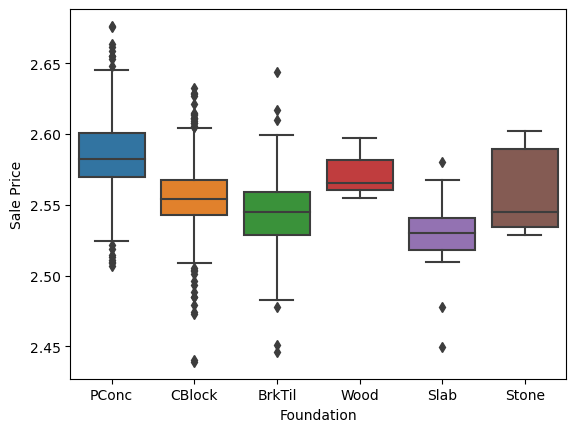

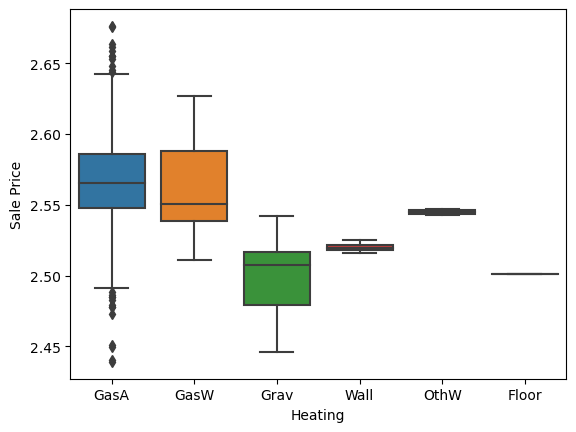

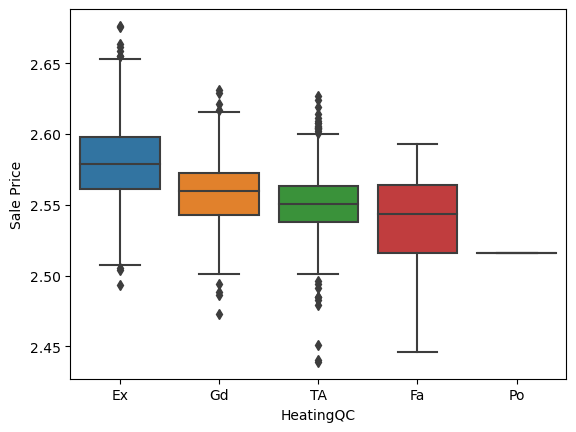

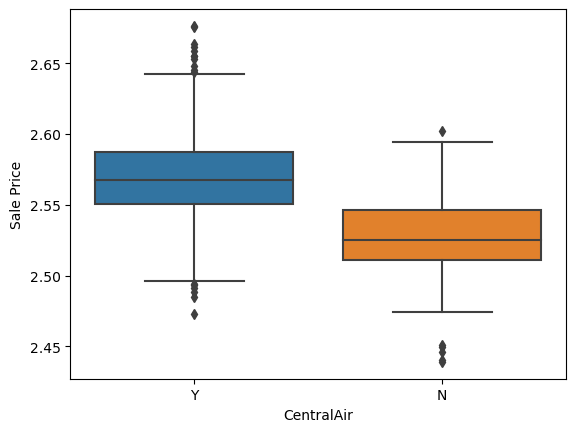

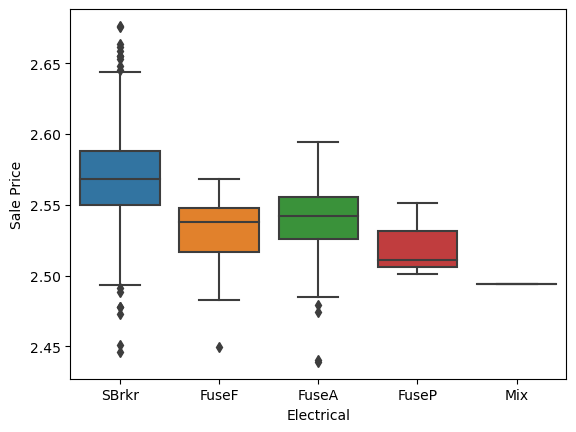

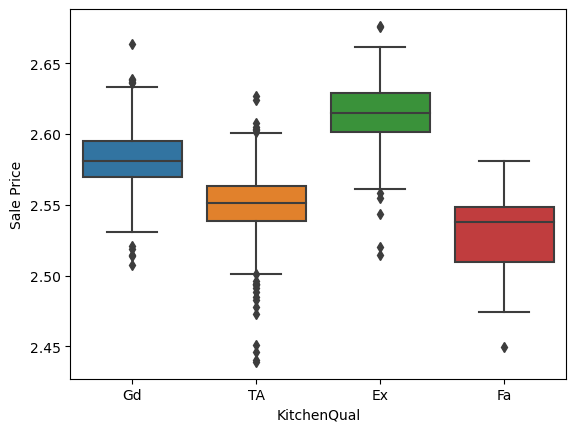

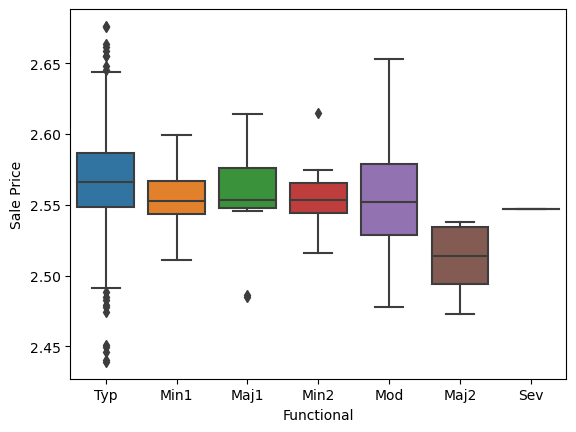

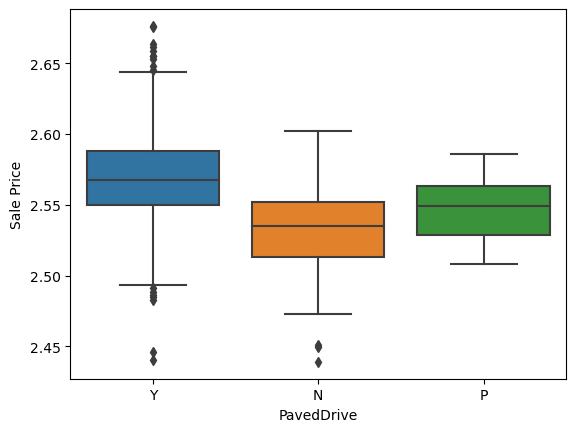

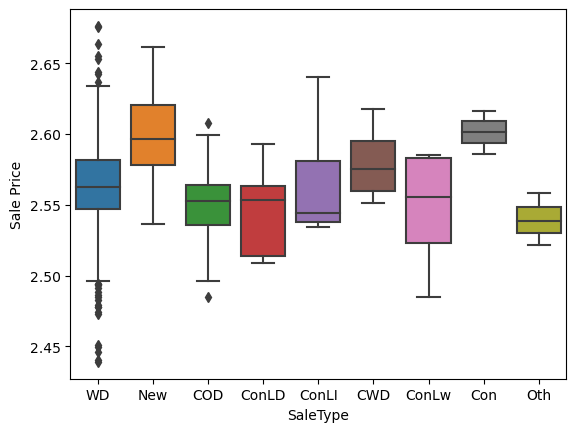

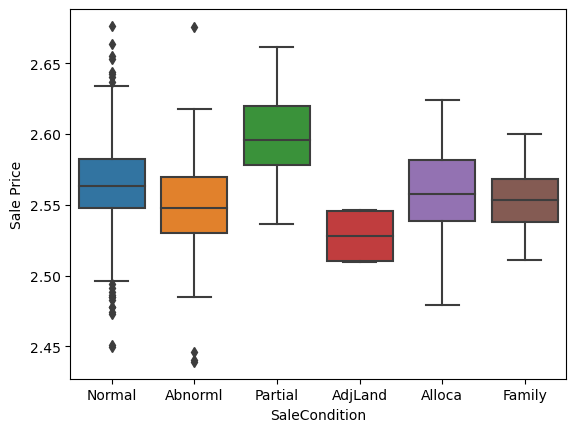

In [175]:
categorical_var=data.select_dtypes(include='object').columns

for feature in categorical_var:
    
    sns.boxplot(x=data[feature],y=data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.show()

It can be seen that most of this categorical features have a significant relationship with the target variable. A t-test can be done to determine the statistical significance of the differences in their mean.

In [103]:
# Separating features and target
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm shapes
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (1168, 64)
Test set shape: (292, 64)


#### Replacing Missing Values

In [176]:
#Separating categorical and numerical columns
cat_cols = X_train.select_dtypes(include='object').columns
num_cols = X_train.select_dtypes(exclude='object').columns

# Filling missing categorical values with 'None'
X_train[cat_cols] = X_train[cat_cols].fillna('None')
X_test[cat_cols] = X_test[cat_cols].fillna('None')

# Filling missing numerical values with median (from training set only)
for col in num_cols:
    median = X_train[col].median()
    X_train[col] = X_train[col].fillna(median)
    X_test[col] = X_test[col].fillna(median)


In [177]:
# Confirming no missing values
print("Missing in X_train:", X_train.isnull().sum().sum())
print("Missing in X_test:", X_test.isnull().sum().sum())


Missing in X_train: 0
Missing in X_test: 0


In [178]:
# Making a copy to avoid SettingWithCopy warnings
X_train = X_train.copy()
X_test = X_test.copy()

# Total Bathrooms
X_train['TotalBathrooms'] = (
    X_train['FullBath'] + (0.5 * X_train['HalfBath']) +
    X_train['BsmtFullBath'] + (0.5 * X_train['BsmtHalfBath'])
)
X_test['TotalBathrooms'] = (
    X_test['FullBath'] + (0.5 * X_test['HalfBath']) +
    X_test['BsmtFullBath'] + (0.5 * X_test['BsmtHalfBath'])
)

# Total Square Footage
X_train['TotalSF'] = X_train['TotalBsmtSF'] + X_train['1stFlrSF'] + X_train['2ndFlrSF']
X_test['TotalSF'] = X_test['TotalBsmtSF'] + X_test['1stFlrSF'] + X_test['2ndFlrSF']

# Age Features
X_train['HouseAge'] = X_train['YrSold'] - X_train['YearBuilt']
X_test['HouseAge'] = X_test['YrSold'] - X_test['YearBuilt']

X_train['RemodAge'] = X_train['YrSold'] - X_train['YearRemodAdd']
X_test['RemodAge'] = X_test['YrSold'] - X_test['YearRemodAdd']

X_train['IsRemodeled'] = (X_train['YearBuilt'] != X_train['YearRemodAdd']).astype(int)
X_test['IsRemodeled'] = (X_test['YearBuilt'] != X_test['YearRemodAdd']).astype(int)

# Binary flags
X_train['HasGarage'] = (X_train['GarageArea'] > 0).astype(int)
X_test['HasGarage'] = (X_test['GarageArea'] > 0).astype(int)

X_train['HasBasement'] = (X_train['TotalBsmtSF'] > 0).astype(int)
X_test['HasBasement'] = (X_test['TotalBsmtSF'] > 0).astype(int)


In [182]:
# Correlation with top numeric features
numeric_feats = X_train.select_dtypes(include=['int64', 'float64'])
correlation = numeric_feats.corrwith(y).sort_values(ascending=False)

# Display top 10 correlated features
print("\nTop correlated features:\n", correlation.head(10))


Top correlated features:
 OverallQual       0.807946
TotalSF           0.761812
GrLivArea         0.689012
GarageCars        0.684451
TotalBathrooms    0.659371
GarageArea        0.654520
TotalBsmtSF       0.597214
FullBath          0.583747
1stFlrSF          0.580948
YearBuilt         0.576725
dtype: float64


These top 10 numeric variables have a good positive correlation with sale price.

In [183]:
#Encoding categorical features
# Keep track of row counts
train_rows = X_train.shape[0]

# Concatenate train and test
combined = pd.concat([X_train, X_test], axis=0)

# One-hot encode all categorical columns
combined_encoded = pd.get_dummies(combined, drop_first=True)

# Split back into train and test
X_train_encoded = combined_encoded.iloc[:train_rows, :]
X_test_encoded = combined_encoded.iloc[train_rows:, :]

# Confirm shape consistency
print("Encoded X_train shape:", X_train_encoded.shape)
print("Encoded X_test shape:", X_test_encoded.shape)


Encoded X_train shape: (1168, 205)
Encoded X_test shape: (292, 205)


In [184]:
print("Any NaNs after feature engineering:", X_train_encoded.isnull().sum().sum())
print("Any Infs after feature engineering:", np.isinf(X_train_encoded).sum().sum())


Any NaNs after feature engineering: 0
Any Infs after feature engineering: 0


In [185]:
print("Max values in columns before scaling:\n")
print(X_train_encoded.max().sort_values(ascending=False).head(20))

Max values in columns before scaling:

LotArea          215245.0
MiscVal           15500.0
TotalSF           11752.0
TotalBsmtSF        6110.0
BsmtFinSF1         5644.0
GrLivArea          5642.0
1stFlrSF           4692.0
BsmtUnfSF          2336.0
2ndFlrSF           2065.0
YrSold             2010.0
YearBuilt          2010.0
YearRemodAdd       2010.0
Id                 1460.0
GarageArea         1418.0
MasVnrArea         1378.0
BsmtFinSF2         1127.0
WoodDeckSF          857.0
PoolArea            738.0
LowQualFinSF        572.0
EnclosedPorch       552.0
dtype: float64


In [186]:
for col in X_train_encoded.columns:
    upper_limit = X_train_encoded[col].quantile(0.99)
    X_train_encoded[col] = np.where(X_train_encoded[col] > upper_limit, upper_limit, X_train_encoded[col])
    X_test_encoded[col] = np.where(X_test_encoded[col] > upper_limit, upper_limit, X_test_encoded[col])

C:\Users\LENOVO T460S\AppData\Local\Temp\ipykernel_3828\816803611.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_encoded[col] = np.where(X_train_encoded[col] > upper_limit, upper_limit, X_train_encoded[col])
C:\Users\LENOVO T460S\AppData\Local\Temp\ipykernel_3828\816803611.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_encoded[col] = np.where(X_test_encoded[col] > upper_limit, upper_limit, X_test_encoded[col])
C:\Users\LENOVO T460S\AppData\Local\Temp\ipykernel_3828\816803611.py:3: S

C:\Users\LENOVO T460S\AppData\Local\Temp\ipykernel_3828\816803611.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_encoded[col] = np.where(X_train_encoded[col] > upper_limit, upper_limit, X_train_encoded[col])
C:\Users\LENOVO T460S\AppData\Local\Temp\ipykernel_3828\816803611.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_encoded[col] = np.where(X_test_encoded[col] > upper_limit, upper_limit, X_test_encoded[col])
C:\Users\LENOVO T460S\AppData\Local\Temp\ipykernel_3828\816803611.py:3: S

In [187]:
# Scaling the features to get them ready for modelling.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [132]:
print("Any NaNs in X_train_scaled?", np.isnan(X_train_scaled).sum())
print("Any NaNs in X_test_scaled?", np.isnan(X_test_scaled).sum())
print("Any Infs in X_train_scaled?", np.isinf(X_train_scaled).sum())
print("Any Infs in X_test_scaled?", np.isinf(X_test_scaled).sum())


Any NaNs in X_train_scaled? 0
Any NaNs in X_test_scaled? 0
Any Infs in X_train_scaled? 0
Any Infs in X_test_scaled? 0


### Building a Linear Regression Model

In [133]:
# Initialize and train model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predict
y_pred = lr.predict(X_test_scaled)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Linear Regression RMSE (log scale): {rmse:.4f}")

Linear Regression RMSE (log scale): 0.1283


In [134]:
# Sanity checking predictions before applying expm1
print("Min of y_pred:", np.min(y_pred))
print("Max of y_pred:", np.max(y_pred))
print("Any NaNs in y_pred?", np.isnan(y_pred).any())
print("Any Infs in y_pred?", np.isinf(y_pred).any())


Min of y_pred: 10.76089231605291
Max of y_pred: 13.348105187812699
Any NaNs in y_pred? False
Any Infs in y_pred? False


In [188]:
# Converting back to real sales values instead of log values.
y_pred_actual = np.expm1(y_pred)
y_test_actual = np.expm1(y_test)


In [189]:
#Calculating the RMSE of the real sales values.
actual_rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
print(f"Linear Regression RMSE (original scale): ${actual_rmse:,.2f}")

Linear Regression RMSE (original scale): $32,392.05


In [135]:
# The numpy clip function may also be used alternatively to the same end.
y_pred_clipped = np.clip(y_pred, a_min=0, a_max=20)
y_test_clipped = np.clip(y_test, a_min=0, a_max=20)

# Convert back from log-transformed to original price
y_pred_actual = np.expm1(y_pred_clipped)
y_test_actual = np.expm1(y_test_clipped)

# Step 4: Evaluate RMSE in actual SalePrice units
actual_rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
print(f"Linear Regression RMSE (original scale): ${actual_rmse:,.2f}")

Linear Regression RMSE (original scale): $32,392.05


In [136]:
print("y_pred_clipped range:", y_pred_clipped.min(), "to", y_pred_clipped.max())
print("Corresponding price range:", np.expm1(y_pred_clipped.min()), "to", np.expm1(y_pred_clipped.max()))


y_pred_clipped range: 10.76089231605291 to 13.348105187812699
Corresponding price range: 47139.71368439225 to 626625.023434171


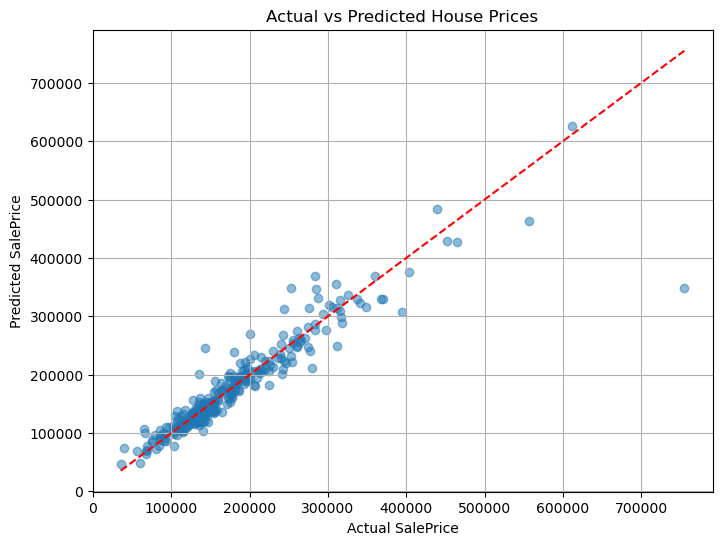

In [137]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_actual, y_pred_actual, alpha=0.5)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--')
plt.grid(True)
plt.show()


In [138]:
# Clip the predicted log SalePrice before inverse transformation
y_pred_clipped = np.clip(y_pred, a_min=None, a_max=np.log1p(800000))  # Max reasonable price

# Transform back to original price scale
y_pred_actual = np.expm1(y_pred_clipped)
y_test_actual = np.expm1(y_test)

# Recalculate RMSE
actual_rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
print(f"Linear Regression RMSE (clipped, original scale): ${actual_rmse:,.2f}")


Linear Regression RMSE (clipped, original scale): $32,392.05


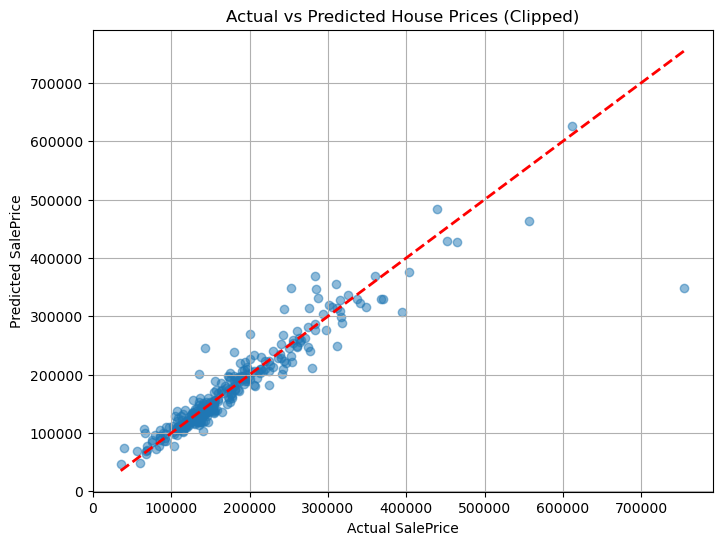

In [139]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_actual, y_pred_actual, alpha=0.5)
plt.plot([y_test_actual.min(), y_test_actual.max()],
         [y_test_actual.min(), y_test_actual.max()],
         'r--', lw=2)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted House Prices (Clipped)')
plt.grid(True)
plt.show()


### Building a Ridge Regression Model

In [140]:
# Alpha is the regularization strength (it can be tuned later)
ridge = Ridge(alpha=1.0)

# Fiting Ridge on the scaled training data
ridge.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_ridge_log = ridge.predict(X_test_scaled)


In [141]:
# Clipping to prevent exp overflow
y_pred_ridge_log_clipped = np.clip(y_pred_ridge_log, a_min=None, a_max=np.log1p(800000))

# Inverse-transform log-predictions
y_pred_ridge_actual = np.expm1(y_pred_ridge_log_clipped)
y_test_actual = np.expm1(y_test)  # y_test is still in log form


In [155]:

rmse_ridge = np.sqrt(mean_squared_error(y_test_actual, y_pred_ridge_actual))
mae_ridge = mean_absolute_error(y_test_actual, y_pred_ridge_actual)
r2_ridge = r2_score(y_test_actual, y_pred_ridge_actual)

print(f"Ridge RMSE: ${rmse_ridge:,.2f}")
print(f"Ridge MAE: ${mae_ridge:,.2f}")
print(f"Ridge R²: {r2_ridge:.4f}")


Ridge RMSE: $30,036.44
Ridge MAE: $15,577.29
Ridge R²: 0.8824


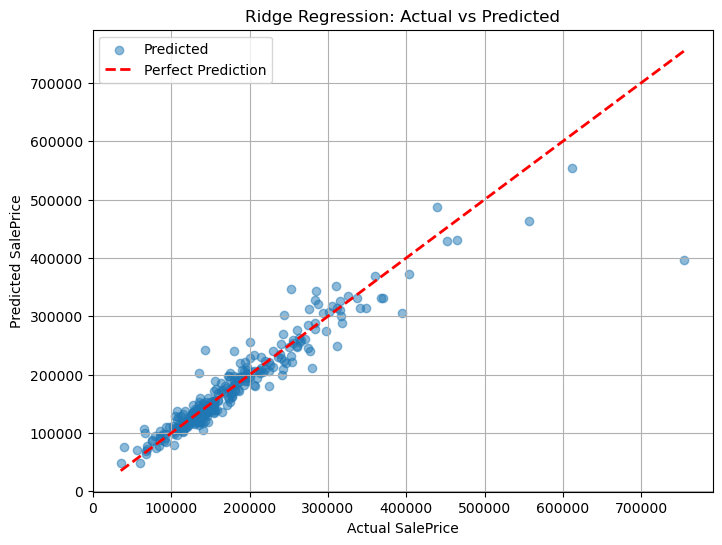

In [143]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_actual, y_pred_ridge_actual, alpha=0.5, label='Predicted')
plt.plot([y_test_actual.min(), y_test_actual.max()],
         [y_test_actual.min(), y_test_actual.max()],
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Ridge Regression: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()


### Building a Random Forest Regressor Model

Random Forest RMSE: $28,628.13
Random Forest MAE: $17,273.65
Random Forest R²: 0.8932


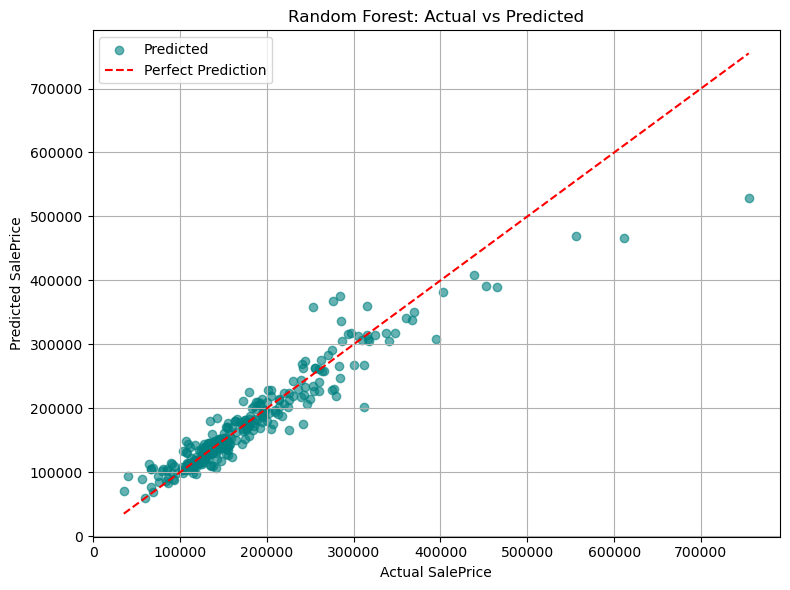

In [146]:
# Train Random Forest on log-transformed SalePrice
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train_scaled, y_train)

# Predict on test set (still in log-scale)
y_pred_log_rf = rf.predict(X_test_scaled)

# Convert predictions back to original scale
y_pred_rf = np.expm1(y_pred_log_rf)
y_test_actual = np.expm1(y_test)

# Clipping predictions to prevent overflow (optional, but helps with weird outliers)
y_pred_rf = np.clip(y_pred_rf, 0, y_test_actual.max())

# Evaluation
rmse_rf = np.sqrt(mean_squared_error(y_test_actual, y_pred_rf))
mae_rf = mean_absolute_error(y_test_actual, y_pred_rf)
r2_rf = r2_score(y_test_actual, y_pred_rf)

print(f"Random Forest RMSE: ${rmse_rf:,.2f}")
print(f"Random Forest MAE: ${mae_rf:,.2f}")
print(f"Random Forest R²: {r2_rf:.4f}")

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test_actual, y_pred_rf, alpha=0.6, color='teal', label='Predicted')
plt.plot([y_test_actual.min(), y_test_actual.max()],
         [y_test_actual.min(), y_test_actual.max()],
         'r--', label='Perfect Prediction')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Random Forest: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Of the three models built so far, the random forest regressor is the best performing model so it will be deployed to make house sale price prediction.

In [191]:
# Saving the trained Random Forest Regression model
joblib.dump(rf, 'rf_regression_model.pkl')

# Save your preprocessing pipeline
joblib.dump(scaler, 'preprocessor.pkl')


['preprocessor.pkl']

In [158]:
# Save your preprocessing pipeline
joblib.dump(scaler, 'preprocessor.pkl')


['preprocessor.pkl']

### Deploying the Model

In [196]:
st.title("🏡 House Price Batch Prediction")
st.markdown("Upload a CSV file with property features to predict sale prices.")

uploaded_file = st.file_uploader("Upload CSV", type=["csv"])

if uploaded_file is not None:
    input_df = pd.read_csv(uploaded_file)
    
    # Preprocess and predict
    processed_input = scaler.transform(input_df)
    predictions = rf.predict(processed_input)
    sale_prices = np.expm1(predictions)
    
    input_df['Predicted SalePrice'] = sale_prices
    st.dataframe(input_df)

    # Optionally allow download
    csv = input_df.to_csv(index=False).encode()
    st.download_button("Download predictions", csv, "predictions.csv", "text/csv")


2025-04-13 22:15:18.040 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-13 22:15:18.043 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-13 22:15:18.045 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-13 22:15:18.048 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-13 22:15:18.050 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-13 22:15:18.052 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-13 22:15:18.054 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-13 22:15:18.056 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar